In [165]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
username = !whoami
username

['alibow']

In [8]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = list(range(7,16))
sex_ids = [2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [9]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'

In [10]:
location_ids = (list(
                pd.read_csv(coverage_data_dir)
                .location_id
                .unique()))
location_ids

[161,
 201,
 202,
 205,
 171,
 179,
 163,
 11,
 180,
 184,
 15,
 164,
 214,
 165,
 196,
 190,
 189,
 20]

In [12]:
nutrient = 'iron'
vehicles = ['wheat flour', 'maize flour']
effective_fractions = [1] * len(age_group_ids)

In [13]:
baseline_coverage, counterfactual_coverage = get_baseline_and_counterfactual_coverage(coverage_data_dir,
                                             location_ids,
                                             nutrient,
                                             vehicles,
                                             years,
                                             coverage_levels)
counterfactual_coverage.head()

Excluded [11]/iron/wheat flour due to impossible logical values
Excluded [205]/iron/maize flour due to impossible logical values


,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,vehicle,year
0,0.2,0.000311,0.002541,0.025241,0.004743,0.004695,0.007025,0.020704,0.024473,0.009634,...,0.002537,0.000939,0.021634,0.008003,0.004971,0.012208,0.007011,15,wheat flour,2021
1,0.5,0.000311,0.002541,0.025241,0.004743,0.004695,0.007025,0.020704,0.024473,0.009634,...,0.002537,0.000939,0.021634,0.008003,0.004971,0.012208,0.007011,15,wheat flour,2021
2,0.8,0.000311,0.002541,0.025241,0.004743,0.004695,0.007025,0.020704,0.024473,0.009634,...,0.002537,0.000939,0.021634,0.008003,0.004971,0.012208,0.007011,15,wheat flour,2021
3,0.2,0.003948,0.008454,0.033482,0.011371,0.011312,0.014089,0.028796,0.032691,0.017030,...,0.008448,0.005726,0.029760,0.015208,0.011653,0.019839,0.014073,15,wheat flour,2022
4,0.5,0.009403,0.017322,0.045842,0.021314,0.021238,0.024686,0.040934,0.045018,0.028126,...,0.017313,0.012907,0.041949,0.026014,0.021675,0.031286,0.024667,15,wheat flour,2022


# HEMOGLOBIN

In [14]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [15]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
161,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
201,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
202,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
205,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
171,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [20]:
# NOTE:
# This approach currently does not consider that new coverage
# applies to those who are slightly more anemic
# than the overall population due to their lack
# of access to fortification

effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage.set_index(['location_id','vehicle','year']), 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage.set_index(['location_id','vehicle','year','coverage_level']), 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

NOTE: not currently applying time lag effect.
NOTE: not currently applying time lag effect.


draw_0  \
location_id sex_id age_group_id vehicle     year coverage_level             
15          2      7            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2             0.003637   
                                                 0.5             0.009091   
...                                                                   ...   
214         2      15           wheat flour 2024 0.5             0.215554   
                                                 0.8             0.344887   
                                            2025 0.2             0.086222   
                                                 0.5             0.215554   
                                                 0.8             0.344887   

                                                                   draw_1  \
location_id sex_id age_group_id vehicle     year coverage_level             
15          2      7            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2             0.005912   
                                                 0.5             0.014781   
...                                                                   ...   
214         2      15           wheat flour 2024 0.5             0.215736   
                                                 0.8             0.345177   
                                            2025 0.2             0.086294   
                                                 0.5             0.215736   
                                                 0.8             0.345177   

                                                                  draw_10  \
location_id sex_id age_group_id vehicle     year coverage_level             
15          2      7            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2             0.008240   
                                                 0.5             0.020601   
...                                                                   ...   
214         2      15           wheat flour 2024 0.5             0.215597   
                                                 0.8             0.344955   
                                            2025 0.2             0.086239   
                                                 0.5             0.215597   
                                                 0.8             0.344955   

                                                                 draw_100  \
location_id sex_id age_group_id vehicle     year coverage_level             
15          2      7            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2             0.006628   
                                                 0.5             0.016571   
...                                                                   ...   
214         2      15           wheat flour 2024 0.5             0.215566   
                                                 0.8             0.344906   
                                            2025 0.2             0.086227   
                                                 0.5             0.215566   
                                                 0.8             0.344906   

                                                           

In [114]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb = mean_hgb.reset_index()
mean_hgb = (mean_hgb
            .loc[mean_hgb.year_id.isin([2025, np.nan])]
            .set_index([c for c in mean_hgb.columns if 'draw' not in c]))

mean_hgb.to_csv('anemia_files_wra/mean_hgb_wra.csv')
mean_hgb = (mean_hgb.reset_index()
            .rename(columns={'year_id':'year'})
            .set_index(['location_id','vehicle','sex_id','age_group_id','coverage_level','year']))

# note, expect to see missing results for locations excluded due to illogical values

mean_hgb

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v107/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



draw_0  \
location_id vehicle     sex_id age_group_id coverage_level year                 
11          wheat flour 2      7            baseline       NaN     125.720458   
                               8            baseline       NaN     123.909047   
                               9            baseline       NaN     126.279327   
                               10           baseline       NaN     127.370087   
                               11           baseline       NaN     124.102796   
...                                                                       ...   
214         wheat flour 2      14           0.5            2025.0  121.405217   
                                            0.8            2025.0  122.139029   
                               15           0.2            2025.0  124.747880   
                                            0.5            2025.0  125.481692   
                                            0.8            2025.0  126.215504   

                                                                       draw_1  \
location_id vehicle     sex_id age_group_id coverage_level year                 
11          wheat flour 2      7            baseline       NaN     125.013067   
                               8            baseline       NaN     124.923568   
                               9            baseline       NaN     129.756698   
                               10           baseline       NaN     123.591184   
                               11           baseline       NaN     128.072308   
...                                                                       ...   
214         wheat flour 2      14           0.5            2025.0  117.491552   
                                            0.8            2025.0  117.784484   
                               15           0.2            2025.0  127.874383   
                                            0.5            2025.0  128.167315   
                                            0.8            2025.0  128.460247   

                                                                      draw_10  \
location_id vehicle     sex_id age_group_id coverage_level year                 
11          wheat flour 2      7            baseline       NaN     123.877956   
                               8            baseline       NaN     130.778339   
                               9            baseline       NaN     127.747059   
                               10           baseline       NaN     124.936974   
                               11           baseline       NaN     127.937545   
...                                                                       ...   
214         wheat flour 2      14           0.5            2025.0  120.584437   
                                            0.8            2025.0  120.844548   
                               15           0.2            2025.0  123.049189   
                                            0.5            2025.0  123.309300   
                                            0.8            2025.0  123.569411   

                                                                     draw_100  \
location_id vehicle     sex_id age_group_id coverage_level year                 
11          wheat flour 2      7            baseline       NaN     131.046273   
                               8            baseline       NaN     125.834611   
                               9            baseline       NaN     126.493747   
                               10           baseline       NaN     127.437921   
                               11           baseline       NaN     125.883403   
...                                                                       ...   
214         wheat flour 2      14           0.5            2025.0  118.887047   
                                            0.8            2025.0  119.098216   
                               15           0.2            2025.0  119.078217   
                  

In [26]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
hgb_sd = (hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index())
hgb_sd.to_csv('anemia_files_wra/sd_hgb_wra.csv')
hgb_sd.head()

,location_id,sex_id,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,11,2,7,13.292978,11.733902,12.935610,12.320549,14.694083,11.641884,11.431122,...,11.937170,14.399819,12.861581,13.566565,12.164301,13.666041,14.456370,12.005398,12.240155,14.472192
1,11,2,8,13.048941,12.197300,12.731180,15.277344,13.369539,14.518696,14.063543,...,12.613480,13.173946,11.281764,13.472578,13.443456,14.703646,11.525980,13.965222,13.907065,12.660112
2,11,2,9,12.543767,11.401418,12.888930,12.235923,13.494031,12.088787,12.987416,...,11.474242,13.854220,13.195765,12.937137,14.376137,13.119984,13.970816,12.079224,12.637997,13.366738
3,11,2,10,12.688434,12.885363,14.576534,11.692162,13.442872,12.988569,13.790864,...,12.558221,12.488462,12.442922,13.015538,11.233946,12.781795,12.458717,10.758250,12.619695,12.304094
4,11,2,11,13.946558,13.899470,14.838546,12.968994,11.884177,13.638474,12.981515,...,12.948337,12.461297,14.151997,15.132955,13.837780,16.155101,12.949827,14.163339,14.101253,13.043767


In [27]:
# get age-specific fertility rate
get_covariate_estimates(13, 
                               location_id=location_ids,
                               age_group_id=age_group_ids,
                               sex_id=sex_ids,
                               year_id=2019,
                               gbd_round_id=6,
                               decomp_step='step4').to_csv('anemia_files_wra/asfr.csv')


# get still birth to live birth ratio (not age-specific)
still = get_covariate_estimates(2267, 
                                location_id=location_ids,
                                year_id=2019,
                                gbd_round_id=6,
                                decomp_step='step4').to_csv('anemia_files_wra/still.csv')

In [11]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

AssertionError: Make sure you run the R file!

In [116]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_files_wra/anemia_prev_wra.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','age_group_id','sex_id','year','draw','vehicle']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','age_group_id','sex_id','year','draw','vehicle','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id age_group_id sex_id year draw     vehicle     coverage_level             
11          7            2      2021 draw_0   maize flour NaN                  NaN   
                                              wheat flour NaN                  NaN   
                                     draw_1   maize flour NaN                  NaN   
                                              wheat flour NaN                  NaN   
                                     draw_10  maize flour NaN                  NaN   
...                                                                            ...   
214         15           2      2025 draw_998 wheat flour 0.8             0.008966   
                                     draw_999 maize flour NaN                  NaN   
                                              wheat flour 0.2             0.001149   
                                                          0.5             0.002886   
                                                          0.8             0.004638   

                                                                          moderate  \
location_id age_group_id sex_id year draw     vehicle     coverage_level             
11          7            2      2021 draw_0   maize flour NaN                  NaN   
                                              wheat flour NaN                  NaN   
                                     draw_1   maize flour NaN                  NaN   
                                              wheat flour NaN                  NaN   
                                     draw_10  maize flour NaN                  NaN   
...                                                                            ...   
214         15           2      2025 draw_998 wheat flour 0.8             0.008238   
                                     draw_999 maize flour NaN                  NaN   
                                              wheat flour 0.2             0.002477   
                                                          0.5             0.006157   
                                                          0.8             0.009796   

                                                                            severe  \
location_id age_group_id sex_id year draw     vehicle     coverage_level             
11          7            2      2021 draw_0   maize flour NaN                  NaN   
                                              wheat flour NaN                  NaN   
                                     draw_1   maize flour NaN                  NaN   
                                              wheat flour NaN                  NaN   
                                     draw_10  maize flour NaN                  NaN   
...                                                                            ...   
214         15           2      2025 draw_998 wheat flour 0.8             0.000244   
                                     draw_999 maize flour NaN                  NaN   
                                              wheat flour 0.2             0.000211   
                                                          0.5             0.000522   
                                                          0.8             0.000824   

                                                                            anemic  \
location_id age_group_id sex_id year draw     vehicle     coverage_level             
11          7            2      2021 draw_0   maize flour NaN                  NaN   
                                              wheat flour NaN                  NaN   
                                     draw_1   maize flour NaN                  NaN   
                                              wheat flour NaN                  NaN   
                                     draw_10  maize flour NaN                  NaN   
...                                                                            ...   
214         15           2      2

In [170]:
anemia_cols = ['mild','moderate','severe','anemic','moderate_ylds','mild_ylds','severe_ylds','anemic_ylds']

anemia_diff = anemia.drop(columns='year').dropna()
pop = get_population(location_id=location_ids,
                    sex_id=sex_ids,
                    age_group_id=age_group_ids,
                    year_id=2019,
                    gbd_round_id=6,
                    decomp_step='step4')
anemia_diff = anemia_diff.merge(pop, on=['location_id','age_group_id','sex_id'])
for col in anemia_cols:
    anemia_diff[f'{col}'] = anemia_diff[f'{col}'] * anemia_diff['population']
anemia_diff = anemia_diff.groupby(['location_id','draw','vehicle','coverage_level']).sum().filter(anemia_cols)#.reset_index()
anemia_diff = anemia_diff.stack().reset_index().rename(columns={'level_4':'measure',0:'value'})
anemia_diff = pd.pivot_table(anemia_diff, index=['location_id','vehicle','coverage_level','measure'],
                            columns='draw',
                            values='value')

anemia_diff.to_pickle('results_raw/iron_anemia_diff_wra.pkl')
anemia_diff.head()

draw                                                      draw_0  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       2.637210e+07   
                                       anemic_ylds  6.671784e+05   
                                       mild         1.549830e+07   
                                       mild_ylds    6.199318e+04   
                                       moderate     1.046403e+07   

draw                                                      draw_1  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       2.429721e+07   
                                       anemic_ylds  5.996035e+05   
                                       mild         1.457537e+07   
                                       mild_ylds    5.830147e+04   
                                       moderate     9.353122e+06   

draw                                                     draw_10  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       2.264961e+07   
                                       anemic_ylds  5.703172e+05   
                                       mild         1.341309e+07   
                                       mild_ylds    5.365238e+04   
                                       moderate     8.861614e+06   

draw                                                    draw_100  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       2.337201e+07   
                                       anemic_ylds  6.166579e+05   
                                       mild         1.350204e+07   
                                       mild_ylds    5.400814e+04   
                                       moderate     9.360580e+06   

draw                                                    draw_101  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       2.277636e+07   
                                       anemic_ylds  5.553496e+05   
                                       mild         1.380981e+07   
                                       mild_ylds    5.523924e+04   
                                       moderate     8.617587e+06   

draw                                                    draw_102  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       2.241173e+07   
                                       anemic_ylds  5.594738e+05   
                                       mild         1.339552e+07   
                                       mild_ylds    5.358208e+04   
                                       moderate     8.634260e+06   

draw                                                    draw_103  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       2.279121e+07   
                                       anemic_ylds  5.762296e+05   
                                       mild         1.348176e+07   
                                       mild_ylds    5.392705e+04   
                                       moderate     8.915517e+06   

draw                                                    draw_104  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       2.253967e+07   
                                       anemic_ylds  5.481474e+05   
                                       mild         1.369272e+07   
                                       mild_ylds    5.477089e+04   
                                       moderate     8.503289e+06   

draw                                                    draw_105  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic   

In [121]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [122]:
counts = summarize_data(counts)
rates = summarize_data(rates)

In [123]:
anemia_counts_averted = (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','vehicle','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_counts_averted.head()

draw                                                draw_0       draw_1  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   364.813327   245.779359   
                        0.5            2025.0   911.195759   614.017651   
                        0.8            2025.0  1456.573685   981.739292   
20          wheat flour 0.2            2025.0  2402.205679  1374.855212   
                        0.5            2025.0  5907.544280  3410.030822   

draw                                               draw_10     draw_100  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   281.448425   204.907988   
                        0.5            2025.0   703.013071   512.003404   
                        0.8            2025.0  1123.848722   818.779033   
20          wheat flour 0.2            2025.0  1141.911272   719.898084   
                        0.5            2025.0  2835.663049  1790.536278   

draw                                              draw_101     draw_102  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   436.713042   481.591981   
                        0.5            2025.0  1090.490608  1202.523467   
                        0.8            2025.0  1742.718817  1921.708324   
20          wheat flour 0.2            2025.0  1999.753485  1383.458893   
                        0.5            2025.0  4937.169672  3423.910469   

draw                                             draw_103     draw_104  \
location_id vehicle     coverage_level year                              
15          wheat flour 0.2            2025.0  100.404452   581.971223   
                        0.5            2025.0  250.937379  1452.734847   
                        0.8            2025.0  401.381825  2320.868789   
20          wheat flour 0.2            2025.0  257.987260  1282.980031   
                        0.5            2025.0  643.625516  3178.059111   

draw                                              draw_105     draw_106  ...  \
location_id vehicle     coverage_level year                              ...   
15          wheat flour 0.2            2025.0   282.499434   689.606937  ...   
                        0.5            2025.0   705.703721  1720.414579  ...   
                        0.8            2025.0  1128.254471  2746.905254  ...   
20          wheat flour 0.2            2025.0  1121.414490  1674.498429  ...   
                        0.5            2025.0  2783.761851  4135.158478  ...   

draw                                              draw_990     draw_991  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   316.803524   306.143414   
                        0.5            2025.0   791.316833   764.727096   
                        0.8            2025.0  1265.000320  1222.553518   
20          wheat flour 0.2            2025.0  1320.325000  1376.016329   
                        0.5            2025.0  3270.766652  3412.583014   

draw                                              draw_992     draw_993  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   621.332345   576.264241   
                        0.5            2025.0  1550.807123  1438.134361   
                        0.8            2025.0  2477.256525  2296.977773   
20          wheat flour 0.2            2025.0  1556.263287  1515.745064   
                        0.5            2025.0  3834.260226  3737.769772   

draw                                              draw_994     draw_995  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   162.085332   464.210003   
                        0.5            2025.0   405.030126  1159.

In [124]:
anemia_rates_averted = (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','vehicle','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_rates_averted.head()

draw                                              draw_0     draw_1   draw_10  \
location_id vehicle     coverage_level year                                     
15          wheat flour 0.2            2025.0   1.919633   1.293281  1.480970   
                        0.5            2025.0   4.794676   3.230936  3.699227   
                        0.8            2025.0   7.664433   5.165873  5.913647   
20          wheat flour 0.2            2025.0   7.363072   4.214110  3.500106   
                        0.5            2025.0  18.107391  10.452187  8.691676   

draw                                           draw_100   draw_101   draw_102  \
location_id vehicle     coverage_level year                                     
15          wheat flour 0.2            2025.0  1.078218   2.297967   2.534118   
                        0.5            2025.0  2.694142   5.738118   6.327631   
                        0.8            2025.0  4.308383   9.170117  10.111953   
20          wheat flour 0.2            2025.0  2.206581   6.129504   4.240481   
                        0.5            2025.0  5.488226  15.133066  10.494730   

draw                                           draw_103   draw_104  draw_105  \
location_id vehicle     coverage_level year                                    
15          wheat flour 0.2            2025.0  0.528324   3.062309  1.486501   
                        0.5            2025.0  1.320423   7.644233  3.713385   
                        0.8            2025.0  2.112055  12.212319  5.936830   
20          wheat flour 0.2            2025.0  0.790764   3.932500  3.437281   
                        0.5            2025.0  1.972796   9.741164  8.532592   

draw                                            draw_106  ...   draw_990  \
location_id vehicle     coverage_level year               ...              
15          wheat flour 0.2            2025.0   3.628684  ...   1.667008   
                        0.5            2025.0   9.052753  ...   4.163878   
                        0.8            2025.0  14.454106  ...   6.656381   
20          wheat flour 0.2            2025.0   5.132555  ...   4.046968   
                        0.5            2025.0  12.674798  ...  10.025325   

draw                                            draw_991   draw_992  \
location_id vehicle     coverage_level year                           
15          wheat flour 0.2            2025.0   1.610914   3.269426   
                        0.5            2025.0   4.023964   8.160285   
                        0.8            2025.0   6.433028  13.035225   
20          wheat flour 0.2            2025.0   4.217669   4.770149   
                        0.5            2025.0  10.460010  11.752506   

draw                                            draw_993  draw_994   draw_995  \
location_id vehicle     coverage_level year                                     
15          wheat flour 0.2            2025.0   3.032280  0.852887   2.442655   
                        0.5            2025.0   7.567406  2.131252   6.099175   
                        0.8            2025.0  12.086606  3.408462   9.746750   
20          wheat flour 0.2            2025.0   4.645955  1.343249   5.858626   
                        0.5            2025.0  11.456750  3.347857  14.484618   

draw                                            draw_996  draw_997   draw_998  \
location_id vehicle     coverage_level year                                     
15          wheat flour 0.2            2025.0   2.688317  1.371895   1.414331   
                        0.5            2025.0   6.711608  3.427039   3.533181   
                        0.8            2025.0  10.723888  5.478946   5.648860   
20          wheat flour 0.2            2025.0   4.283970  2.509832   4.067763   
                        0.5            2025.0  10.572243  6.242723  10.065461   

draw                                           draw_999  
location_id vehicle     coverage_level year              
15          wheat fl

In [28]:
# total iron responsive anemia burden
iron_responsive_anemia_sequelae = [1004, 1005, 1006, 1008, 1009, 1010, 1012, 1013, 
                                   1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026, 
                                   1028, 1029, 1030, 1032, 1033, 1034, 1361, 1364, 1367, 1373, 1376, 
                                   1379, 1385, 1388, 1391, 1397, 1400, 1403, 1409, 1412, 1415, 1421, 
                                   1424, 1427, 1433, 1436, 1439, 1445, 1448, 1451, 5213, 5216, 5219, 
                                   5222, 5225, 5228, 5237, 5240, 5243, 5246, 5249, 5252, 5261, 5264, 
                                   5267, 5270, 5273, 5276, 4985, 4988, 4991, 4994, 4997, 5000, 5009, 
                                   5012, 5015, 5678, 5681, 5684, 7214, 7217, 7220, 4952, 4955, 4958, 
                                   4961, 4964, 4967, 4976, 4979, 4982, 5627, 5630, 5633, 7202, 7205, 
                                   7208, 5393, 5396, 5399, 182, 183, 184, 240, 241, 242, 177, 178, 
                                   179, 144,145,146,172,173,174,525,526,527,1106,1107,1108,537,538,
                                   539,206,207,208, 22989, 22990, 22991, 22992, 22993, 22999, 23000, 
                                   23001, 23002, 23003, 23009, 23010, 23011, 23012, 23013,
                                   5567, 5570, 5573, 5579, 5582, 5585,
                                   23030, 23031, 23032, 23034, 23035, 23036, 23038, 23039, 23040,
                                   23042, 23043, 23044, 23046, 23047, 23048]

ira_ylds = get_draws('sequela_id', iron_responsive_anemia_sequelae, 
                 source='como',
                 location_id=location_ids, 
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 measure_id=3,
                 decomp_step='step5',
                 gbd_round_id=6)
ira_ylds = ira_ylds.groupby(['location_id','sex_id','age_group_id'], as_index=False).sum()

pop = get_population(location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    gbd_round_id=6,
                    year_id=2019,
                    decomp_step='step4')

ira_ylds = ira_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] * ira_ylds['population']
ira_ylds = ira_ylds.groupby(['location_id']).sum()
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] / ira_ylds['population'] * 100_000
ira_ylds = ira_ylds.drop(columns=[c for c in ira_ylds.columns if 'draw' not in c])
ira_ylds.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
11,809.742321,682.380657,540.657010,713.507046,535.650523,614.637011,691.887717,527.329779,740.871339,464.686349,...,457.670248,691.152648,581.092441,569.453589,621.514402,653.395784,355.674448,468.554738,437.401744,573.793518
15,1165.677602,1024.724016,798.548094,1125.979673,850.254048,1036.408959,1026.833363,851.020927,1114.407576,700.764019,...,860.833218,1035.594794,1032.030641,856.656757,916.625132,1076.488273,511.788271,728.085922,769.820640,904.507905
20,367.290472,368.594553,306.299292,333.001772,305.650688,294.254884,303.917782,253.653451,374.208848,251.087895,...,289.525941,376.053908,257.793100,244.783757,318.369979,370.470222,140.774655,284.897535,239.583945,223.643206
161,815.373354,757.259280,633.009214,756.366688,616.591860,660.079125,788.492728,645.117877,738.218553,511.467067,...,650.579609,729.907661,712.948787,506.126551,708.556881,629.241746,336.382230,542.628894,620.173775,494.706553
163,1648.044374,1527.160131,1265.674924,1554.341027,1286.920146,1459.132145,1617.330958,1238.704420,1639.631445,1022.995656,...,1246.385955,1520.507539,1505.262585,1368.586206,1400.305859,1496.696733,728.304694,1181.105742,1171.923801,1147.538967


In [29]:
# check iron responsive portion
impairment_anemia = get_draws(gbd_id_type='rei_id',
         gbd_id=[192],
         source='como',
         location_id=location_ids,
         sex_id=sex_ids,
         age_group_id=age_group_ids,
         gbd_round_id=6,
         year_id=2019,
         decomp_step='step5',
         measure_id=[3])
impairment_anemia = impairment_anemia.loc[impairment_anemia.cause_id==294]
impairment_anemia = impairment_anemia.merge(pop, on=['location_id','sex_id'])
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] * impairment_anemia['population']
impairment_anemia = impairment_anemia.groupby(['location_id','measure_id','rei_id']).sum()
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] / impairment_anemia['population'] * 100_000
impairment_anemia = impairment_anemia.drop(columns=[c for c in impairment_anemia.columns if 'draw' not in c])
(ira_ylds / impairment_anemia).mean(axis=1)

location_id  measure_id  rei_id
11           3           192       0.961034
15           3           192       0.916792
20           3           192       1.078846
161          3           192       0.796116
163          3           192       0.799578
164          3           192       0.940607
165          3           192       0.857264
171          3           192       0.582179
179          3           192       0.828381
180          3           192       0.608740
184          3           192       0.530953
189          3           192       0.677578
190          3           192       0.485159
196          3           192       0.705113
201          3           192       0.572733
202          3           192       0.623709
205          3           192       0.531386
214          3           192       0.681668
dtype: float64

In [125]:
anemia_pifs = anemia_rates_averted / (ira_ylds) * 100
anemia_pifs.head()

draw                                             draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.164680  0.126208  0.185458   
                        0.5            2025.0  0.411321  0.315298  0.463244   
                        0.8            2025.0  0.657509  0.504123  0.740550   
20          wheat flour 0.2            2025.0  2.004700  1.143291  1.142708   
                        0.5            2025.0  4.929992  2.835687  2.837641   

draw                                           draw_100  draw_101  draw_102  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.095758  0.270268  0.244509   
                        0.5            2025.0  0.239271  0.674871  0.610534   
                        0.8            2025.0  0.382634  1.078515  0.975672   
20          wheat flour 0.2            2025.0  0.662633  2.005395  1.441091   
                        0.5            2025.0  1.648107  4.951098  3.566544   

draw                                           draw_103  draw_104  draw_105  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.051452  0.359839  0.133389   
                        0.5            2025.0  0.128592  0.898243  0.333216   
                        0.8            2025.0  0.205686  1.435020  0.532734   
20          wheat flour 0.2            2025.0  0.260190  1.550344  0.918546   
                        0.5            2025.0  0.649122  3.840344  2.280168   

draw                                           draw_106  ...  draw_990  \
location_id vehicle     coverage_level year              ...             
15          wheat flour 0.2            2025.0  0.517818  ...  0.193650   
                        0.5            2025.0  1.291840  ...  0.483703   
                        0.8            2025.0  2.062621  ...  0.773249   
20          wheat flour 0.2            2025.0  2.044127  ...  1.397791   
                        0.5            2025.0  5.047953  ...  3.462669   

draw                                           draw_991  draw_992  draw_993  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.155555  0.316795  0.353967   
                        0.5            2025.0  0.388565  0.790702  0.883365   
                        0.8            2025.0  0.621192  1.263066  1.410904   
20          wheat flour 0.2            2025.0  1.121560  1.850379  1.897984   
                        0.5            2025.0  2.781519  4.558891  4.680355   

draw                                           draw_994  draw_995  draw_996  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.093046  0.226910  0.525279   
                        0.5            2025.0  0.232511  0.566581  1.311403   
                        0.8            2025.0  0.371849  0.905421  2.095376   
20          wheat flour 0.2            2025.0  0.421914  1.581403  3.043140   
                        0.5            2025.0  1.051562  3.909793  7.510047   

draw                                           draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                  
15          wheat flour 0.2            2025.0  0.188425  0.183722  0.161754  
                        0.5            2025.0  0.470692  0.458962  0.404122  
                        0.8            2025.0  0.752514  0.733789  0.646176  
20          wheat flour 0.2            2025.0  0.880960  1.697844  1.335423  
                        0.5            2025.0  2.191217  4.201225  3.309526  

[5 rows x 1000 columns]

In [171]:
anemia_pifs['measure'] = 'pif'
anemia_rates_averted['measure'] = 'rates_averted'
anemia_counts_averted['measure'] = 'counts_averted'

anemia_wra_results = pd.concat([anemia_pifs, anemia_rates_averted, anemia_counts_averted], sort=True).reset_index()
anemia_wra_results = anemia_wra_results.set_index([c for c in anemia_wra_results if 'draw' not in c])

anemia_wra_results.to_pickle('results_raw/iron_anemia_wra.pkl')

anemia_wra_results.head()

draw                                                     draw_0    draw_1  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.164680  0.126208   
                        0.5            2025.0 pif      0.411321  0.315298   
                        0.8            2025.0 pif      0.657509  0.504123   
20          wheat flour 0.2            2025.0 pif      2.004700  1.143291   
                        0.5            2025.0 pif      4.929992  2.835687   

draw                                                    draw_10  draw_100  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.185458  0.095758   
                        0.5            2025.0 pif      0.463244  0.239271   
                        0.8            2025.0 pif      0.740550  0.382634   
20          wheat flour 0.2            2025.0 pif      1.142708  0.662633   
                        0.5            2025.0 pif      2.837641  1.648107   

draw                                                   draw_101  draw_102  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.270268  0.244509   
                        0.5            2025.0 pif      0.674871  0.610534   
                        0.8            2025.0 pif      1.078515  0.975672   
20          wheat flour 0.2            2025.0 pif      2.005395  1.441091   
                        0.5            2025.0 pif      4.951098  3.566544   

draw                                                   draw_103  draw_104  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.051452  0.359839   
                        0.5            2025.0 pif      0.128592  0.898243   
                        0.8            2025.0 pif      0.205686  1.435020   
20          wheat flour 0.2            2025.0 pif      0.260190  1.550344   
                        0.5            2025.0 pif      0.649122  3.840344   

draw                                                   draw_105  draw_106  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.133389  0.517818   
                        0.5            2025.0 pif      0.333216  1.291840   
                        0.8            2025.0 pif      0.532734  2.062621   
20          wheat flour 0.2            2025.0 pif      0.918546  2.044127   
                        0.5            2025.0 pif      2.280168  5.047953   

draw                                                   ...  draw_990  \
location_id vehicle     coverage_level year   measure  ...             
15          wheat flour 0.2            2025.0 pif      ...  0.193650   
                        0.5            2025.0 pif      ...  0.483703   
                        0.8            2025.0 pif      ...  0.773249   
20          wheat flour 0.2            2025.0 pif      ...  1.397791   
                        0.5            2025.0 pif      ...  3.462669   

draw                                                   draw_991  draw_992  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.155555  0.316795   
                        0.5            2025.0 pif      0.388565  0.790702   
                        0.8            2025.0 pif      0.621192  1.263066   
20          wheat flour 0.2            2025.0 pif      1.121560  1.850379   
                        0.5            2025.0 pif      2.781519  4.558891   

draw                                                   draw_993  draw_994  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.353967  0.093046   
                        

# MATERNAL DISORDERS

In [30]:
rr = get_draws('rei_id',
                 95,
                 source='rr',
                 location_id=location_ids,
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 gbd_round_id=6,
                 decomp_step='step4'
                 )
rr = rr.loc[rr.cause_id==367].set_index(['sex_id','age_group_id'])
rr = rr.drop(columns=[c for c in rr.columns if 'draw' not in c])
rr

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v107/lib/python3.7/site-packages/get_draws/sources/rr.py:256: UserWarning: RRs draws returned for rei_id = 95 have location_id(s) = 1 where 161, 201, 202, 205, 171, 179, 163, 11, 180, 184, 15, 164, 214, 165, 196, 190, 189, 20 were requested.
  ", ".join(str(hf) for hf in hdf_filters['location_id'])


draw_0    draw_1    draw_2    draw_3    draw_4  \
sex_id age_group_id                                                     
2      8             1.212408  1.350076  1.086644  1.219068  1.261495   
       13            1.212408  1.350076  1.086644  1.219068  1.261495   
       11            1.212408  1.350076  1.086644  1.219068  1.261495   
       10            1.212408  1.350076  1.086644  1.219068  1.261495   
       9             1.212408  1.350076  1.086644  1.219068  1.261495   
       12            1.212408  1.350076  1.086644  1.219068  1.261495   
       14            1.212408  1.350076  1.086644  1.219068  1.261495   
       7             1.212408  1.350076  1.086644  1.219068  1.261495   
       15            1.212408  1.350076  1.086644  1.219068  1.261495   

                       draw_5    draw_6    draw_7   draw_8    draw_9  ...  \
sex_id age_group_id                                                   ...   
2      8             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       13            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       11            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       10            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       9             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       12            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       14            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       7             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       15            1.286287  1.092801  1.212885  1.19206  1.194871  ...   

                     draw_990  draw_991  draw_992  draw_993  draw_994  \
sex_id age_group_id                                                     
2      8             1.189681  1.315712   1.28604  1.257695  1.216908   
       13            1.189681  1.315712   1.28604  1.257695  1.216908   
       11            1.189681  1.315712   1.28604  1.257695  1.216908   
       10            1.189681  1.315712   1.28604  1.257695  1.216908   
       9             1.189681  1.315712   1.28604  1.257695  1.216908   
       12            1.189681  1.315712   1.28604  1.257695  1.216908   
       14            1.189681  1.315712   1.28604  1.257695  1.216908   
       7             1.189681  1.315712   1.28604  1.257695  1.216908   
       15            1.189681  1.315712   1.28604  1.257695  1.216908   

                     draw_995  draw_996  draw_997  draw_998  draw_999  
sex_id age_group_id                                                    
2      8             1.177559  1.315347  1.221176  1.276526  1.243538  
       13            1.177559  1.315347  1.221176  1.276526  1.243538  
       11            1.177559  1.315347  1.221176  1.276526  1.243538  
       10            1.177559  1.315347  1.221176  1.276526  1.243538  
       9             1.177559  1.315347  1.221176  1.276526  1.243538  
       12            1.177559  1.315347  1.221176  1.276526  1.243538  
       14            1.177559  1.315347  1.221176  1.276526  1.243538  
       7             1.177559  1.315347  1.221176  1.276526  1.243538  
       15            1.177559  1.315347  1.221176  1.276526  1.243538  

[9 rows x 1000 columns]

In [31]:
baseline_hgb = get_draws('modelable_entity_id',
                    10487,
                    source='epi',
                    location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    year_id=2019,
                    gbd_round_id=6,
                    decomp_step='step4',
                    status='best')
baseline_hgb = baseline_hgb.set_index(['location_id','sex_id','age_group_id'])
baseline_hgb = baseline_hgb.drop(columns=[c for c in baseline_hgb.columns if 'draw' not in c])
baseline_hgb.head()

draw_0      draw_1     draw_10  \
location_id sex_id age_group_id                                       
11          2      7             125.720458  125.013067  123.877956   
                   8             123.909047  124.923568  130.778339   
                   9             126.279327  129.756698  127.747059   
                   10            127.370087  123.591184  124.936974   
                   11            124.102796  128.072308  127.937545   

                                   draw_100    draw_101    draw_102  \
location_id sex_id age_group_id                                       
11          2      7             131.046273  126.535151  126.539773   
                   8             125.834611  124.179762  131.425035   
                   9             126.493747  127.871689  126.866193   
                   10            127.437921  127.871399  126.539961   
                   11            125.883403  125.754281  125.336822   

                                   draw_103    draw_104    draw_105  \
location_id sex_id age_group_id                                       
11          2      7             128.910306  130.213900  124.539656   
                   8             130.662542  130.573890  124.279944   
                   9             125.532345  127.220828  127.520039   
                   10            128.011740  129.364461  125.843733   
                   11            131.052587  124.180565  130.917344   

                                   draw_106  ...    draw_990    draw_991  \
location_id sex_id age_group_id              ...                           
11          2      7             126.966239  ...  127.598859  128.639075   
                   8             130.325987  ...  129.610821  126.145738   
                   9             125.757247  ...  128.830036  129.892692   
                   10            129.093740  ...  127.874589  126.383536   
                   11            124.230008  ...  125.236726  126.314923   

                                   draw_992    draw_993    draw_994  \
location_id sex_id age_group_id                                       
11          2      7             127.495184  126.026349  126.802325   
                   8             131.445379  125.873082  128.667313   
                   9             129.194790  128.552509  128.126533   
                   10            125.760543  127.463698  128.855356   
                   11            126.743300  127.318785  133.116473   

                                   draw_995    draw_996    draw_997  \
location_id sex_id age_group_id                                       
11          2      7             123.832785  125.791511  126.368115   
                   8             125.066203  132.511309  127.834327   
                   9             125.604651  131.079342  131.531884   
                   10            130.627663  122.278558  124.942197   
                   11            129.348699  126.391037  126.928617   

                                   draw_998    draw_999  
location_id sex_id age_group_id                          
11          2      7             128.945972  125.442573  
                   8             131.196175  130.157132  
                   9             126.830442  130.693367  
                   10            130.590653  132.024848  
                   11            127.330763  124.853824  

[5 rows x 1000 columns]

In [127]:
hgb_diff = (((mean_hgb - baseline_hgb) / 10)
            .reset_index()
            .set_index(['sex_id','age_group_id','location_id','coverage_level','year','vehicle']))
hgb_diff.head()

draw_0  \
sex_id age_group_id location_id coverage_level year vehicle               
2      7            11          baseline       NaN  wheat flour     0.0   
                                                    maize flour     0.0   
                                NaN            NaN  NaN             NaN   
       8            11          baseline       NaN  wheat flour     0.0   
                                                    maize flour     0.0   

                                                                 draw_1  \
sex_id age_group_id location_id coverage_level year vehicle               
2      7            11          baseline       NaN  wheat flour     0.0   
                                                    maize flour     0.0   
                                NaN            NaN  NaN             NaN   
       8            11          baseline       NaN  wheat flour     0.0   
                                                    maize flour     0.0   

                                                                 draw_10  \
sex_id age_group_id location_id coverage_level year vehicle                
2      7            11          baseline       NaN  wheat flour      0.0   
                                                    maize flour      0.0   
                                NaN            NaN  NaN              NaN   
       8            11          baseline       NaN  wheat flour      0.0   
                                                    maize flour      0.0   

                                                                 draw_100  \
sex_id age_group_id location_id coverage_level year vehicle                 
2      7            11          baseline       NaN  wheat flour       0.0   
                                                    maize flour       0.0   
                                NaN            NaN  NaN               NaN   
       8            11          baseline       NaN  wheat flour       0.0   
                                                    maize flour       0.0   

                                                                 draw_101  \
sex_id age_group_id location_id coverage_level year vehicle                 
2      7            11          baseline       NaN  wheat flour       0.0   
                                                    maize flour       0.0   
                                NaN            NaN  NaN               NaN   
       8            11          baseline       NaN  wheat flour       0.0   
                                                    maize flour       0.0   

                                                                 draw_102  \
sex_id age_group_id location_id coverage_level year vehicle                 
2      7            11          baseline       NaN  wheat flour       0.0   
                                                    maize flour       0.0   
                                NaN            NaN  NaN               NaN   
       8            11          baseline       NaN  wheat flour       0.0   
                                                    maize flour       0.0   

                                                                 draw_103  \
sex_id age_group_id location_id coverage_level year vehicle                 
2      7            11          baseline       NaN  wheat flour       0.0   
                                                    maize flour       0.0   
                                NaN            NaN  NaN               NaN   
       8            11          baseline       NaN  wheat flour       0.0   
                                                    maize flour       0.0   

                                                                 draw_104  \
sex_id age_group_id location_id coverage_level year vehicle                 
2      7            11          baseline       NaN  wheat flour       0.0   
                                                    maize flour       0.0   
            

In [128]:
import math
frac_reduction = ((1 / math.e ** (np.log(rr) * hgb_diff))
                  .reset_index()
                  .set_index(['location_id','sex_id','age_group_id','coverage_level','year','vehicle']))
frac_reduction.head()

draw_0  \
location_id sex_id age_group_id coverage_level year vehicle               
11          2      7            baseline       NaN  wheat flour     1.0   
                                                    maize flour     1.0   
                                NaN            NaN  NaN             NaN   
15          2      7            baseline       NaN  wheat flour     1.0   
                                                    maize flour     1.0   

                                                                 draw_1  \
location_id sex_id age_group_id coverage_level year vehicle               
11          2      7            baseline       NaN  wheat flour     1.0   
                                                    maize flour     1.0   
                                NaN            NaN  NaN             NaN   
15          2      7            baseline       NaN  wheat flour     1.0   
                                                    maize flour     1.0   

                                                                 draw_10  \
location_id sex_id age_group_id coverage_level year vehicle                
11          2      7            baseline       NaN  wheat flour      1.0   
                                                    maize flour      1.0   
                                NaN            NaN  NaN              NaN   
15          2      7            baseline       NaN  wheat flour      1.0   
                                                    maize flour      1.0   

                                                                 draw_100  \
location_id sex_id age_group_id coverage_level year vehicle                 
11          2      7            baseline       NaN  wheat flour       1.0   
                                                    maize flour       1.0   
                                NaN            NaN  NaN               NaN   
15          2      7            baseline       NaN  wheat flour       1.0   
                                                    maize flour       1.0   

                                                                 draw_101  \
location_id sex_id age_group_id coverage_level year vehicle                 
11          2      7            baseline       NaN  wheat flour       1.0   
                                                    maize flour       1.0   
                                NaN            NaN  NaN               NaN   
15          2      7            baseline       NaN  wheat flour       1.0   
                                                    maize flour       1.0   

                                                                 draw_102  \
location_id sex_id age_group_id coverage_level year vehicle                 
11          2      7            baseline       NaN  wheat flour       1.0   
                                                    maize flour       1.0   
                                NaN            NaN  NaN               NaN   
15          2      7            baseline       NaN  wheat flour       1.0   
                                                    maize flour       1.0   

                                                                 draw_103  \
location_id sex_id age_group_id coverage_level year vehicle                 
11          2      7            baseline       NaN  wheat flour       1.0   
                                                    maize flour       1.0   
                                NaN            NaN  NaN               NaN   
15          2      7            baseline       NaN  wheat flour       1.0   
                                                    maize flour       1.0   

                                                                 draw_104  \
location_id sex_id age_group_id coverage_level year vehicle                 
11          2      7            baseline       NaN  wheat flour       1.0   
                                                    maize flour       1.0   
            

In [39]:
maternal_ylds = get_draws('cause_id',
                367,
                source='como',
                location_id=location_ids,
                age_group_id=age_group_ids,
                measure_id=3, #ylds
                metric_id=3, #rate
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step5')
pop = get_population(location_id=location_ids,
                    sex_id=sex_ids,
                    age_group_id=age_group_ids,
                    gbd_round_id=6,
                    decomp_step='step4')
maternal_ylds = maternal_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    maternal_ylds[f'draw_{i}'] = maternal_ylds[f'draw_{i}'] * maternal_ylds['population']

maternal_ylds = maternal_ylds.set_index(['location_id','sex_id','age_group_id'])
maternal_ylds = maternal_ylds.drop(columns=[c for c in maternal_ylds.columns if 'draw' not in c])
maternal_ylds.head()

draw_0       draw_1      draw_10  \
location_id sex_id age_group_id                                          
11          2      7                3.586432     4.998050     3.445164   
                   8              585.737491   585.426156   491.528819   
                   9             1922.505580  1276.277180  1917.771792   
                   10            4060.989508  4025.468974  4192.070797   
                   11            4455.327358  3118.082544  3211.384518   

                                    draw_100     draw_101     draw_102  \
location_id sex_id age_group_id                                          
11          2      7                2.116180     2.344429     1.962343   
                   8              528.633002   452.269796   430.703978   
                   9             1740.962970  2239.173970  1613.572678   
                   10            4131.366644  4668.040857  4016.559428   
                   11            4115.780991  3081.222415  3658.435750   

                                    draw_103     draw_104     draw_105  \
location_id sex_id age_group_id                                          
11          2      7                2.024419     2.148836     5.864235   
                   8              459.285431   491.153859   760.852711   
                   9             2040.319616  1924.962518  1333.200821   
                   10            4433.866685  3314.553836  4079.742520   
                   11            2917.687330  2962.917146  3668.764115   

                                    draw_106  ...     draw_990     draw_991  \
location_id sex_id age_group_id               ...                             
11          2      7                1.384865  ...     3.034912     4.170687   
                   8              271.857649  ...   494.872637  1021.817513   
                   9             1161.819940  ...  1439.148492  3564.418236   
                   10            2832.033212  ...  3605.415130  3914.302468   
                   11            2678.979705  ...  2823.482936  2935.157893   

                                    draw_992     draw_993     draw_994  \
location_id sex_id age_group_id                                          
11          2      7                3.349819     2.861947     2.151309   
                   8              460.191849   593.479878   463.517862   
                   9             2162.130717  1910.494790  2328.013999   
                   10            3547.129545  2637.807829  3262.049063   
                   11            3311.509870  2782.787451  3235.297050   

                                    draw_995     draw_996     draw_997  \
location_id sex_id age_group_id                                          
11          2      7                3.770873     1.982540     2.928532   
                   8              621.126836   189.985218   618.708213   
                   9             1893.261671  1009.037569  1664.215066   
                   10            3877.918388  2138.601526  2846.766586   
                   11            4177.115755  1481.247044  2691.780737   

                                    draw_998     draw_999  
location_id sex_id age_group_id                            
11          2      7                2.121362     2.643029  
                   8              301.103977   302.589682  
                   9             1180.678435  1297.549184  
                   10            2840.064448  2267.987208  
                   11            3238.916812  3085.059741  

[5 rows x 1000 columns]

In [40]:
maternal_ylls = get_draws('cause_id',
                367,
                source='codcorrect',
                location_id=location_ids,
                age_group_id=age_group_ids,
                measure_id=4,
                metric_id=1,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step5',
                status='latest')

maternal_ylls = maternal_ylls.set_index(['location_id','sex_id','age_group_id'])
maternal_ylls = maternal_ylls.drop(columns=[c for c in maternal_ylls.columns if 'draw' not in c])
maternal_ylls.head()

draw_0        draw_1       draw_10  \
location_id sex_id age_group_id                                             
11          2      7               675.402102    576.379372    851.124053   
                   8             17035.059448  10267.173550  11733.353193   
                   9             17106.940174  21064.130315  27093.440891   
                   10            27529.648730  18090.108355  25961.112723   
                   11            19693.763706  18457.835506  21981.038867   

                                     draw_100      draw_101      draw_102  \
location_id sex_id age_group_id                                             
11          2      7               486.538016    889.418333    551.659538   
                   8             12122.816532  17403.603694  12930.613203   
                   9             21927.797991  17009.881472  23397.324135   
                   10            19800.344100  20680.135052  22574.962807   
                   11            20389.021204  18302.948716  16748.808596   

                                     draw_103      draw_104      draw_105  \
location_id sex_id age_group_id                                             
11          2      7               615.710799    627.343427    624.991833   
                   8             14887.891892  10069.628672  12324.197887   
                   9             21598.236991  17174.517221  17982.661058   
                   10            15412.396600  11020.159270  23203.427202   
                   11            19062.819906  12802.212035  20691.140082   

                                     draw_106  ...      draw_990  \
location_id sex_id age_group_id                ...                 
11          2      7               691.792727  ...    380.705751   
                   8             18833.933931  ...  11551.797249   
                   9             22898.693773  ...  15732.960230   
                   10            18208.801935  ...  14247.158825   
                   11            27108.162649  ...  15675.043762   

                                     draw_991      draw_992      draw_993  \
location_id sex_id age_group_id                                             
11          2      7               708.622357    832.972619    557.511990   
                   8             13423.341485  15491.393755  13212.484313   
                   9             23153.955959  23991.776401  21178.278535   
                   10            20366.550781  23152.770207  15508.642945   
                   11            24834.778001  36310.402370  17662.119971   

                                     draw_994      draw_995      draw_996  \
location_id sex_id age_group_id                                             
11          2      7               770.748074    872.983215    620.485120   
                   8             15080.320312  13475.627776  14279.332341   
                   9             24916.795059  16307.667557  23091.716613   
                   10            36355.918759  19408.068056  30866.682918   
                   11            33861.664309  27735.686668  29317.248900   

                                     draw_997      draw_998      draw_999  
location_id sex_id age_group_id                                            
11          2      7               782.854251    747.291351    695.196266  
                   8             12581.398051  14248.173475  15389.637181  
                   9             27949.115225  24137.241881  28621.722688  
                   10            19005.360367  33206.852789  26453.907884  
                   11            26024.570876  28912.464753  37564.705147  

[5 rows x 1000 columns]

In [41]:
maternal_dalys = maternal_ylds + maternal_ylls
maternal_dalys.head()

draw_0        draw_1       draw_10  \
location_id sex_id age_group_id                                             
11          2      7               678.988534    581.377422    854.569217   
                   8             17620.796939  10852.599706  12224.882012   
                   9             19029.445754  22340.407495  29011.212683   
                   10            31590.638238  22115.577329  30153.183521   
                   11            24149.091064  21575.918050  25192.423385   

                                     draw_100      draw_101      draw_102  \
location_id sex_id age_group_id                                             
11          2      7               488.654195    891.762761    553.621881   
                   8             12651.449534  17855.873491  13361.317181   
                   9             23668.760961  19249.055441  25010.896813   
                   10            23931.710744  25348.175909  26591.522235   
                   11            24504.802195  21384.171131  20407.244345   

                                     draw_103      draw_104      draw_105  \
location_id sex_id age_group_id                                             
11          2      7               617.735218    629.492263    630.856068   
                   8             15347.177322  10560.782531  13085.050598   
                   9             23638.556607  19099.479739  19315.861879   
                   10            19846.263285  14334.713106  27283.169723   
                   11            21980.507236  15765.129181  24359.904198   

                                     draw_106  ...      draw_990  \
location_id sex_id age_group_id                ...                 
11          2      7               693.177592  ...    383.740663   
                   8             19105.791580  ...  12046.669885   
                   9             24060.513713  ...  17172.108721   
                   10            21040.835147  ...  17852.573954   
                   11            29787.142354  ...  18498.526697   

                                     draw_991      draw_992      draw_993  \
location_id sex_id age_group_id                                             
11          2      7               712.793044    836.322439    560.373938   
                   8             14445.158998  15951.585604  13805.964192   
                   9             26718.374195  26153.907117  23088.773325   
                   10            24280.853249  26699.899753  18146.450774   
                   11            27769.935893  39621.912240  20444.907422   

                                     draw_994      draw_995      draw_996  \
location_id sex_id age_group_id                                             
11          2      7               772.899383    876.754088    622.467660   
                   8             15543.838174  14096.754612  14469.317559   
                   9             27244.809058  18200.929228  24100.754182   
                   10            39617.967821  23285.986444  33005.284444   
                   11            37096.961359  31912.802423  30798.495945   

                                     draw_997      draw_998      draw_999  
location_id sex_id age_group_id                                            
11          2      7               785.782783    749.412713    697.839296  
                   8             13200.106264  14549.277451  15692.226863  
                   9             29613.330291  25317.920316  29919.271872  
                   10            21852.126953  36046.917237  28721.895092  
                   11            28716.351612  32151.381564  40649.764887  

[5 rows x 1000 columns]

In [136]:
counterfactual_maternal_dalys = maternal_dalys * frac_reduction
counterfactual_maternal_dalys = (counterfactual_maternal_dalys.groupby(['location_id','vehicle','coverage_level','year']).sum())
maternal_counts_averted = maternal_dalys.groupby('location_id').sum() - counterfactual_maternal_dalys
maternal_counts_averted.head()

draw_0     draw_1  \
location_id vehicle     coverage_level year                           
15          wheat flour 0.2            2025.0  12.721441  10.510163   
                        0.5            2025.0  31.794125  26.267495   
                        0.8            2025.0  50.855442  42.015338   
20          wheat flour 0.2            2025.0  37.490193  27.154349   
                        0.5            2025.0  93.459601  67.738127   

                                                 draw_10   draw_100  \
location_id vehicle     coverage_level year                           
15          wheat flour 0.2            2025.0  13.646615   9.150543   
                        0.5            2025.0  34.104306  22.870673   
                        0.8            2025.0  54.547331  36.583985   
20          wheat flour 0.2            2025.0  19.578162  21.053827   
                        0.5            2025.0  48.857867  52.559453   

                                                draw_101   draw_102  \
location_id vehicle     coverage_level year                           
15          wheat flour 0.2            2025.0  13.738095  17.700948   
                        0.5            2025.0  34.334225  44.226831   
                        0.8            2025.0  54.917149  70.722099   
20          wheat flour 0.2            2025.0  25.745737  37.422632   
                        0.5            2025.0  64.234951  93.308925   

                                                draw_103   draw_104  \
location_id vehicle     coverage_level year                           
15          wheat flour 0.2            2025.0   2.676975  16.224565   
                        0.5            2025.0   6.691833  40.545758   
                        0.8            2025.0  10.705967  64.848178   
20          wheat flour 0.2            2025.0   4.692019  17.436423   
                        0.5            2025.0  11.725594  43.532362   

                                                draw_105    draw_106  ...  \
location_id vehicle     coverage_level year                           ...   
15          wheat flour 0.2            2025.0   7.518854   26.581385  ...   
                        0.5            2025.0  18.792759   66.391982  ...   
                        0.8            2025.0  30.061413  106.128924  ...   
20          wheat flour 0.2            2025.0  16.395377   39.053216  ...   
                        0.5            2025.0  40.931460   97.308081  ...   

                                                draw_990   draw_991  \
location_id vehicle     coverage_level year                           
15          wheat flour 0.2            2025.0   7.339971  11.914166   
                        0.5            2025.0  18.345656  29.775136   
                        0.8            2025.0  29.346216  47.623780   
20          wheat flour 0.2            2025.0  14.241529  24.895840   
                        0.5            2025.0  35.553167  62.117635   

                                                 draw_992   draw_993  \
location_id vehicle     coverage_level year                            
15          wheat flour 0.2            2025.0   26.166574  22.499711   
                        0.5            2025.0   65.375639  56.216877   
                        0.8            2025.0  104.535802  89.895199   
20          wheat flour 0.2            2025.0   34.415979  32.856501   
                        0.5            2025.0   85.777410  81.925702   

                                                draw_994   draw_995  \
location_id vehicle     coverage_level year                           
15          wheat flour 0.2            2025.0   5.526175  14.407862   
                        0.5            2025.0  13.813540  36.008675   
                        0.8            2025.0  22.098627  57.596318   
20          wheat flour 0.2            2025.0   6.432654  25.216976   
                        0.5            2025.0  16.073091  62.932230   

                 

In [137]:
maternal_rates_averted = (maternal_counts_averted.reset_index()
                 .merge(pop.groupby('location_id', as_index=False).sum().drop(columns='year_id'), 
                        on='location_id'))
for i in list(range(0,1000)):
    maternal_rates_averted[f'draw_{i}'] = (maternal_rates_averted[f'draw_{i}'] / maternal_rates_averted['population']) * 100_000
maternal_rates_averted = maternal_rates_averted.set_index(['location_id','vehicle','coverage_level','year'])
maternal_rates_averted = maternal_rates_averted.drop(columns=[c for c in maternal_rates_averted.columns if 'draw' not in c])
maternal_rates_averted.head()

draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.066940  0.055304  0.071808   
                        0.5            2025.0  0.167299  0.138219  0.179456   
                        0.8            2025.0  0.267599  0.221083  0.287026   
20          wheat flour 0.2            2025.0  0.114912  0.083232  0.060010   
                        0.5            2025.0  0.286466  0.207626  0.149756   

                                               draw_100  draw_101  draw_102  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.048150  0.072289  0.093142   
                        0.5            2025.0  0.120345  0.180665  0.232720   
                        0.8            2025.0  0.192503  0.288972  0.372137   
20          wheat flour 0.2            2025.0  0.064533  0.078914  0.114705   
                        0.5            2025.0  0.161102  0.196888  0.286004   

                                               draw_103  draw_104  draw_105  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.014086  0.085373  0.039564   
                        0.5            2025.0  0.035212  0.213350  0.098887   
                        0.8            2025.0  0.056334  0.341229  0.158182   
20          wheat flour 0.2            2025.0  0.014382  0.053445  0.050254   
                        0.5            2025.0  0.035940  0.133432  0.125460   

                                               draw_106  ...  draw_990  \
location_id vehicle     coverage_level year              ...             
15          wheat flour 0.2            2025.0  0.139870  ...  0.038623   
                        0.5            2025.0  0.349352  ...  0.096534   
                        0.8            2025.0  0.558446  ...  0.154419   
20          wheat flour 0.2            2025.0  0.119703  ...  0.043652   
                        0.5            2025.0  0.298262  ...  0.108975   

                                               draw_991  draw_992  draw_993  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.062692  0.137687  0.118393   
                        0.5            2025.0  0.156676  0.344004  0.295811   
                        0.8            2025.0  0.250594  0.550063  0.473025   
20          wheat flour 0.2            2025.0  0.076309  0.105489  0.100709   
                        0.5            2025.0  0.190399  0.262919  0.251113   

                                               draw_994  draw_995  draw_996  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.029079  0.075814  0.097434   
                        0.5            2025.0  0.072686  0.189476  0.243444   
                        0.8            2025.0  0.116282  0.303070  0.389287   
20          wheat flour 0.2            2025.0  0.019717  0.077293  0.076822   
                        0.5            2025.0  0.049266  0.192895  0.191521   

                                               draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                  
15          wheat flour 0.2            2025.0  0.048055  0.042872  0.032957  
                        0.5            2025.0  0.120111  0.107151  0.082375  
                        0.8            2025.0  0.192136  0.171393  0.131770  
20          wheat flour 0.2            2025.0  0.037617  0.096465  0.060040  
                        0.5            2025.0  0.093956  0.240636  0.149866  

[5 rows x 1000 columns]

In [44]:
iron_attributable_maternal_disorder_burden = get_draws(gbd_id_type=['rei_id','cause_id'],
                                                      gbd_id=[95,367],
                                                      location_id=location_ids,
                                                      sex_id=sex_ids,
                                                      age_group_id=age_group_ids,
                                                      measure_id=2, # dalys
                                                      metric_id=1, # number
                                                      source='burdenator',
                                                      decomp_step='step5',
                                                      gbd_round_id=6,
                                                      year_id=2019)
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.groupby('location_id').sum()
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.drop(columns=[c for c in iron_attributable_maternal_disorder_burden.columns if 'draw' not in c])
iron_attributable_maternal_disorder_burden = (iron_attributable_maternal_disorder_burden.reset_index()
                                              .merge(pop.groupby('location_id').sum().reset_index(),
                                                     on='location_id'))
for i in list(range(0,1000)):
    iron_attributable_maternal_disorder_burden[f'draw_{i}'] = iron_attributable_maternal_disorder_burden[f'draw_{i}'] / iron_attributable_maternal_disorder_burden['population']
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.set_index(['location_id'])
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.drop(columns=[c for c in iron_attributable_maternal_disorder_burden.columns if 'draw' not in c])

iron_attributable_maternal_disorder_burden

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
11,0.000202,0.000254,0.000321,0.000299,0.000165,0.000301,0.000199,0.000119,0.000201,0.000324,...,0.000116,0.000313,0.000296,0.000214,0.000280,0.000169,0.000321,0.000206,0.000293,0.000318
15,0.000273,0.000342,0.000357,0.000381,0.000235,0.000301,0.000198,0.000218,0.000211,0.000272,...,0.000179,0.000307,0.000331,0.000288,0.000253,0.000243,0.000283,0.000248,0.000228,0.000201
20,0.000033,0.000051,0.000045,0.000063,0.000030,0.000061,0.000033,0.000030,0.000035,0.000050,...,0.000022,0.000048,0.000036,0.000036,0.000031,0.000032,0.000029,0.000035,0.000045,0.000035
161,0.000384,0.000573,0.000565,0.000497,0.000284,0.000408,0.000340,0.000330,0.000258,0.000510,...,0.000303,0.000573,0.000510,0.000400,0.000408,0.000328,0.000406,0.000440,0.000465,0.000352
163,0.000448,0.000637,0.000630,0.000786,0.000430,0.000694,0.000356,0.000377,0.000546,0.000714,...,0.000386,0.000743,0.000584,0.000452,0.000344,0.000384,0.000705,0.000410,0.000613,0.000568
164,0.000290,0.000480,0.000432,0.000576,0.000325,0.000403,0.000337,0.000300,0.000235,0.000512,...,0.000230,0.000526,0.000513,0.000466,0.000391,0.000281,0.000541,0.000344,0.000445,0.000298
165,0.000927,0.001274,0.001052,0.000971,0.000779,0.001226,0.000869,0.000584,0.000875,0.001168,...,0.000666,0.001024,0.001191,0.000777,0.000744,0.000564,0.001107,0.000652,0.000938,0.001070
171,0.000646,0.000791,0.000840,0.001122,0.000845,0.000914,0.000735,0.000630,0.000692,0.000883,...,0.000433,0.001031,0.000995,0.000759,0.000585,0.000661,0.000649,0.000589,0.000647,0.000633
179,0.000425,0.000683,0.000556,0.000792,0.000366,0.000668,0.000473,0.000352,0.000406,0.000526,...,0.000425,0.000716,0.000550,0.000504,0.000365,0.000403,0.000719,0.000494,0.000642,0.000461


In [138]:
maternal_disorders_pif = maternal_rates_averted / (iron_attributable_maternal_disorder_burden * 100_000) * 100
maternal_disorders_pif.head()

draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.245039  0.161931  0.201018   
                        0.5            2025.0  0.612416  0.404705  0.502364   
                        0.8            2025.0  0.979574  0.647333  0.803494   
20          wheat flour 0.2            2025.0  3.445513  1.625241  1.325445   
                        0.5            2025.0  8.589347  4.054260  3.307687   

                                               draw_100  draw_101  draw_102  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.126333  0.307699  0.309178   
                        0.5            2025.0  0.315753  0.769001  0.772500   
                        0.8            2025.0  0.505080  1.230007  1.235286   
20          wheat flour 0.2            2025.0  1.016413  2.658171  1.886701   
                        0.5            2025.0  2.537407  6.632068  4.704266   

                                               draw_103  draw_104  draw_105  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.071252  0.391636  0.187391   
                        0.5            2025.0  0.178114  0.978713  0.468369   
                        0.8            2025.0  0.284956  1.565336  0.749217   
20          wheat flour 0.2            2025.0  0.439142  1.786648  1.444965   
                        0.5            2025.0  1.097439  4.460606  3.607389   

                                               draw_106  ...  draw_990  \
location_id vehicle     coverage_level year              ...             
15          wheat flour 0.2            2025.0  0.514953  ...  0.215179   
                        0.5            2025.0  1.286190  ...  0.537823   
                        0.8            2025.0  2.056001  ...  0.860316   
20          wheat flour 0.2            2025.0  2.389904  ...  1.984610   
                        0.5            2025.0  5.954875  ...  4.954467   

                                               draw_991  draw_992  draw_993  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.204507  0.415892  0.411058   
                        0.5            2025.0  0.511091  1.039081  1.027053   
                        0.8            2025.0  0.817463  1.661493  1.642339   
20          wheat flour 0.2            2025.0  1.603144  2.949659  2.763786   
                        0.5            2025.0  4.000006  7.351646  6.891335   

                                               draw_994  draw_995  draw_996  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.114770  0.312315  0.344818   
                        0.5            2025.0  0.286886  0.780549  0.861549   
                        0.8            2025.0  0.458954  1.248498  1.377687   
20          wheat flour 0.2            2025.0  0.634124  2.446597  2.614873   
                        0.5            2025.0  1.584469  6.105800  6.519024   

                                               draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                  
15          wheat flour 0.2            2025.0  0.193617  0.188311  0.163925  
                        0.5            2025.0  0.483935  0.470646  0.409722  
                        0.8            2025.0  0.774123  0.752822  0.655410  
20          wheat flour 0.2            2025.0  1.083656  2.159597  1.716816  
                        0.5            2025.0  2.706623  5.387196  4.285335  

[5 rows x 1000 columns]

In [172]:
maternal_disorders_pif['measure'] = 'pif'
maternal_rates_averted['measure'] = 'rates_averted'
maternal_counts_averted['measure'] = 'counts_averted'

maternal_disorders_wra_results = pd.concat([maternal_disorders_pif, maternal_rates_averted, maternal_counts_averted], sort=True).reset_index()
maternal_disorders_wra_results = maternal_disorders_wra_results.set_index([c for c in maternal_disorders_wra_results if 'draw' not in c])

maternal_disorders_wra_results.to_pickle('results_raw/iron_maternal_disorders_wra.pkl')

maternal_disorders_wra_results.head()

draw_0    draw_1  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.245039  0.161931   
                        0.5            2025.0 pif      0.612416  0.404705   
                        0.8            2025.0 pif      0.979574  0.647333   
20          wheat flour 0.2            2025.0 pif      3.445513  1.625241   
                        0.5            2025.0 pif      8.589347  4.054260   

                                                        draw_10  draw_100  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.201018  0.126333   
                        0.5            2025.0 pif      0.502364  0.315753   
                        0.8            2025.0 pif      0.803494  0.505080   
20          wheat flour 0.2            2025.0 pif      1.325445  1.016413   
                        0.5            2025.0 pif      3.307687  2.537407   

                                                       draw_101  draw_102  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.307699  0.309178   
                        0.5            2025.0 pif      0.769001  0.772500   
                        0.8            2025.0 pif      1.230007  1.235286   
20          wheat flour 0.2            2025.0 pif      2.658171  1.886701   
                        0.5            2025.0 pif      6.632068  4.704266   

                                                       draw_103  draw_104  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.071252  0.391636   
                        0.5            2025.0 pif      0.178114  0.978713   
                        0.8            2025.0 pif      0.284956  1.565336   
20          wheat flour 0.2            2025.0 pif      0.439142  1.786648   
                        0.5            2025.0 pif      1.097439  4.460606   

                                                       draw_105  draw_106  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.187391  0.514953   
                        0.5            2025.0 pif      0.468369  1.286190   
                        0.8            2025.0 pif      0.749217  2.056001   
20          wheat flour 0.2            2025.0 pif      1.444965  2.389904   
                        0.5            2025.0 pif      3.607389  5.954875   

                                                       ...  draw_990  \
location_id vehicle     coverage_level year   measure  ...             
15          wheat flour 0.2            2025.0 pif      ...  0.215179   
                        0.5            2025.0 pif      ...  0.537823   
                        0.8            2025.0 pif      ...  0.860316   
20          wheat flour 0.2            2025.0 pif      ...  1.984610   
                        0.5            2025.0 pif      ...  4.954467   

                                                       draw_991  draw_992  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.204507  0.415892   
                        0.5            2025.0 pif      0.511091  1.039081   
                        0.8            2025.0 pif      0.817463  1.661493   
20          wheat flour 0.2            2025.0 pif      1.603144  2.949659   
                        0.5            2025.0 pif      4.000006  7.351646   

                                                       draw_993  draw_994  \
location_id vehicle     coverage_level year   measure                       
15          wheat flour 0.2            2025.0 pif      0.411058  0.114770   
                        0.5            2025.0 pif      1.027053  0.286886   
    

# OVERALL

In [139]:
overall_counts_averted = anemia_counts_averted + maternal_counts_averted
overall_rates_averted = anemia_rates_averted + maternal_rates_averted
overall_counts_averted.head()

draw                                                draw_0       draw_1  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   377.534768   256.289522   
                        0.5            2025.0   942.989884   640.285147   
                        0.8            2025.0  1507.429127  1023.754629   
20          wheat flour 0.2            2025.0  2439.695872  1402.009561   
                        0.5            2025.0  6001.003881  3477.768949   

draw                                               draw_10     draw_100  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   295.095040   214.058531   
                        0.5            2025.0   737.117377   534.874077   
                        0.8            2025.0  1178.396053   855.363018   
20          wheat flour 0.2            2025.0  1161.489434   740.951910   
                        0.5            2025.0  2884.520917  1843.095731   

draw                                              draw_101     draw_102  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   450.451137   499.292929   
                        0.5            2025.0  1124.824833  1246.750298   
                        0.8            2025.0  1797.635966  1992.430423   
20          wheat flour 0.2            2025.0  2025.499222  1420.881525   
                        0.5            2025.0  5001.404623  3517.219393   

draw                                             draw_103     draw_104  \
location_id vehicle     coverage_level year                              
15          wheat flour 0.2            2025.0  103.081427   598.195788   
                        0.5            2025.0  257.629212  1493.280605   
                        0.8            2025.0  412.087792  2385.716966   
20          wheat flour 0.2            2025.0  262.679280  1300.416454   
                        0.5            2025.0  655.351110  3221.591473   

draw                                              draw_105     draw_106  ...  \
location_id vehicle     coverage_level year                              ...   
15          wheat flour 0.2            2025.0   290.018288   716.188322  ...   
                        0.5            2025.0   724.496479  1786.806561  ...   
                        0.8            2025.0  1158.315884  2853.034178  ...   
20          wheat flour 0.2            2025.0  1137.809867  1713.551645  ...   
                        0.5            2025.0  2824.693311  4232.466559  ...   

draw                                              draw_990     draw_991  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   324.143495   318.057580   
                        0.5            2025.0   809.662489   794.502232   
                        0.8            2025.0  1294.346536  1270.177298   
20          wheat flour 0.2            2025.0  1334.566528  1400.912170   
                        0.5            2025.0  3306.319819  3474.700649   

draw                                              draw_992     draw_993  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   647.498920   598.763953   
                        0.5            2025.0  1616.182762  1494.351238   
                        0.8            2025.0  2581.792327  2386.872972   
20          wheat flour 0.2            2025.0  1590.679266  1548.601564   
                        0.5            2025.0  3920.037636  3819.695474   

draw                                              draw_994     draw_995  \
location_id vehicle     coverage_level year                               
15          wheat flour 0.2            2025.0   167.611507   478.617865   
                        0.5            2025.0   418.843665  1195.

In [140]:
overall_pif = overall_rates_averted / ((ira_ylds + iron_attributable_maternal_disorder_burden)) * 100
overall_pif.head()

draw                                             draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.170422  0.131605  0.194450   
                        0.5            2025.0  0.425673  0.328786  0.485717   
                        0.8            2025.0  0.680465  0.525698  0.776493   
20          wheat flour 0.2            2025.0  2.035986  1.165872  1.162300   
                        0.5            2025.0  5.007986  2.892016  2.886533   

draw                                           draw_100  draw_101  draw_102  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.100034  0.278770  0.253496   
                        0.5            2025.0  0.249959  0.696119  0.632988   
                        0.8            2025.0  0.399731  1.112501  1.011578   
20          wheat flour 0.2            2025.0  0.682012  2.031213  1.480072   
                        0.5            2025.0  1.696485  5.015514  3.663739   

draw                                           draw_103  draw_104  draw_105  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.052824  0.369871  0.136940   
                        0.5            2025.0  0.132021  0.923312  0.342089   
                        0.8            2025.0  0.211172  1.475116  0.546928   
20          wheat flour 0.2            2025.0  0.264922  1.571414  0.931975   
                        0.5            2025.0  0.660947  3.892947  2.313695   

draw                                           draw_106  ...  draw_990  \
location_id vehicle     coverage_level year              ...             
15          wheat flour 0.2            2025.0  0.537778  ...  0.198137   
                        0.5            2025.0  1.341693  ...  0.494917   
                        0.8            2025.0  2.142311  ...  0.791187   
20          wheat flour 0.2            2025.0  2.091800  ...  1.412868   
                        0.5            2025.0  5.166739  ...  3.500308   

draw                                           draw_991  draw_992  draw_993  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.161608  0.330137  0.367787   
                        0.5            2025.0  0.403694  0.824034  0.917896   
                        0.8            2025.0  0.645390  1.316364  1.466121   
20          wheat flour 0.2            2025.0  1.141852  1.891299  1.939125   
                        0.5            2025.0  2.832149  4.660878  4.782940   

draw                                           draw_994  draw_995  draw_996  \
location_id vehicle     coverage_level year                                   
15          wheat flour 0.2            2025.0  0.096219  0.233952  0.544317   
                        0.5            2025.0  0.240441  0.584182  1.358970   
                        0.8            2025.0  0.384535  0.933574  2.171439   
20          wheat flour 0.2            2025.0  0.428107  1.602266  3.097710   
                        0.5            2025.0  1.067036  3.961860  7.646093   

draw                                           draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                  
15          wheat flour 0.2            2025.0  0.195025  0.189291  0.165398  
                        0.5            2025.0  0.487188  0.472880  0.413229  
                        0.8            2025.0  0.778903  0.756053  0.660744  
20          wheat flour 0.2            2025.0  0.894163  1.738108  1.362269  
                        0.5            2025.0  2.224195  4.301663  3.376536  

[5 rows x 1000 columns]

In [141]:
overall_pif['measure'] = 'pif'
overall_counts_averted['measure'] = 'counts_averted'
overall_rates_averted['measure'] = 'rates_averted'
iron_wra_results = pd.concat([overall_pif.reset_index(),
                         overall_counts_averted.reset_index(),
                         overall_rates_averted.reset_index()],
                        ignore_index=True)
iron_wra_results.to_pickle('results_raw/iron_wra.pkl')

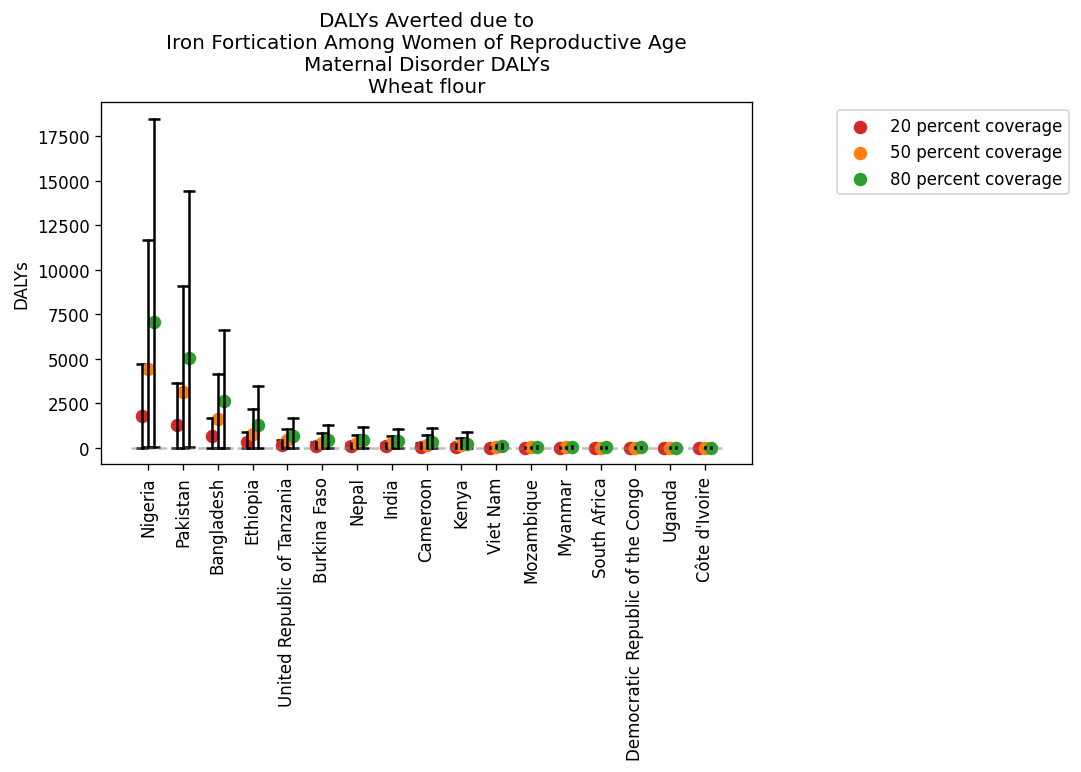

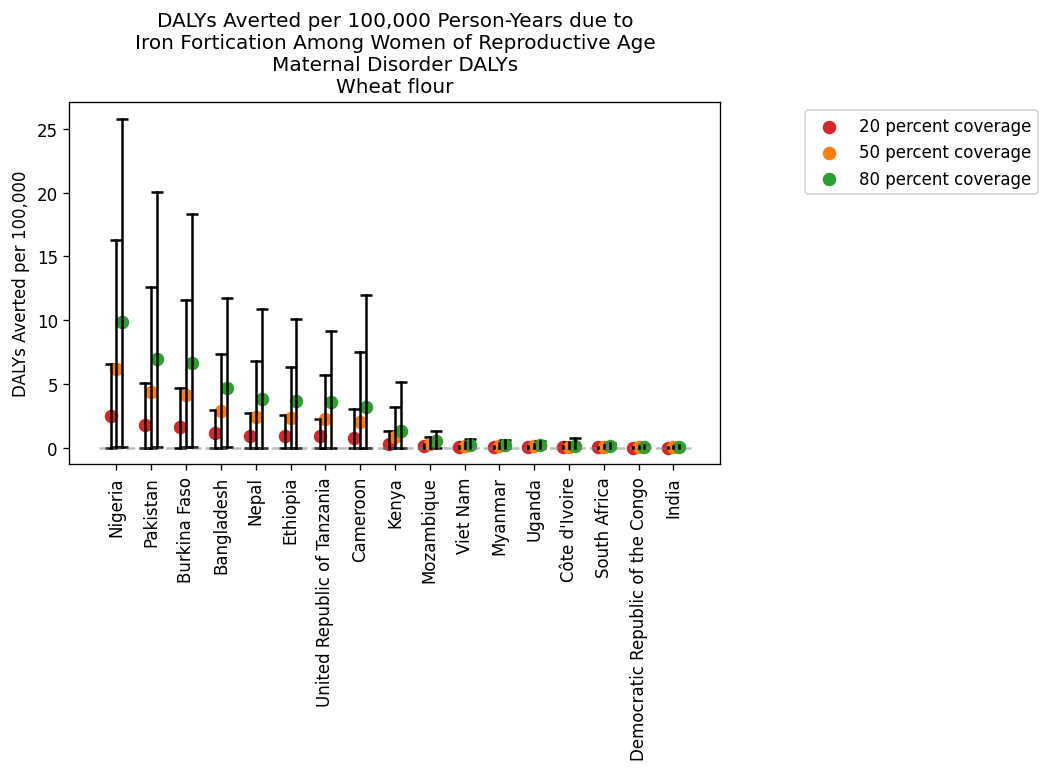

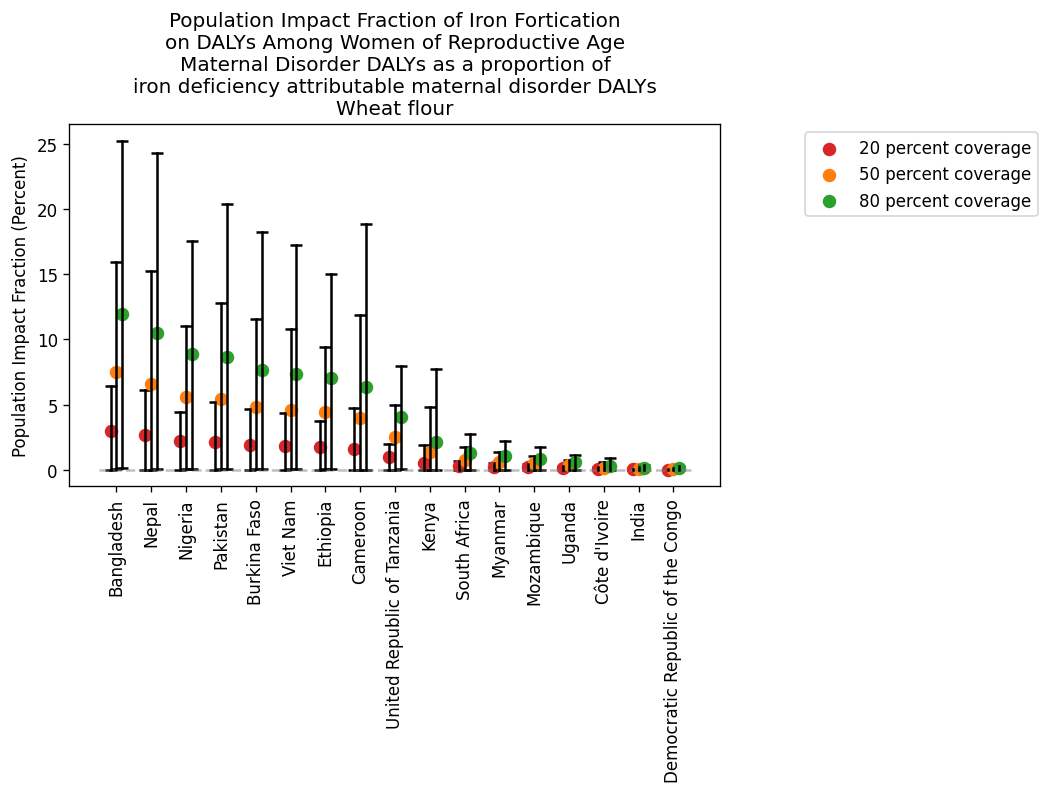

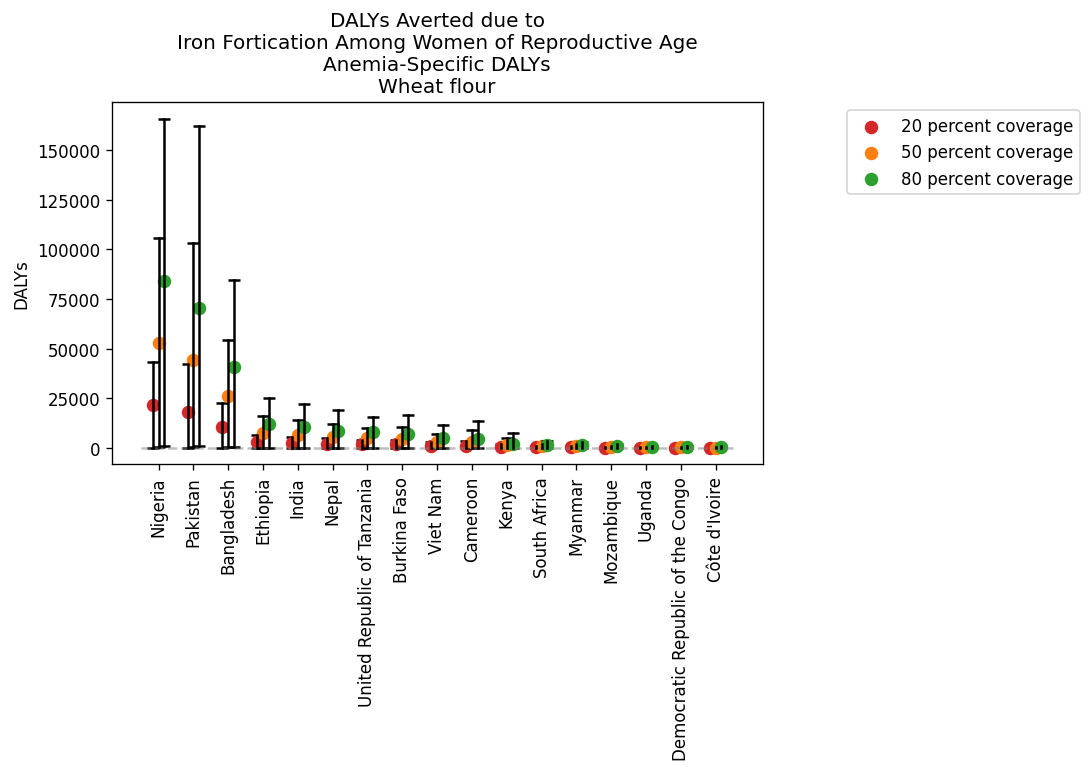

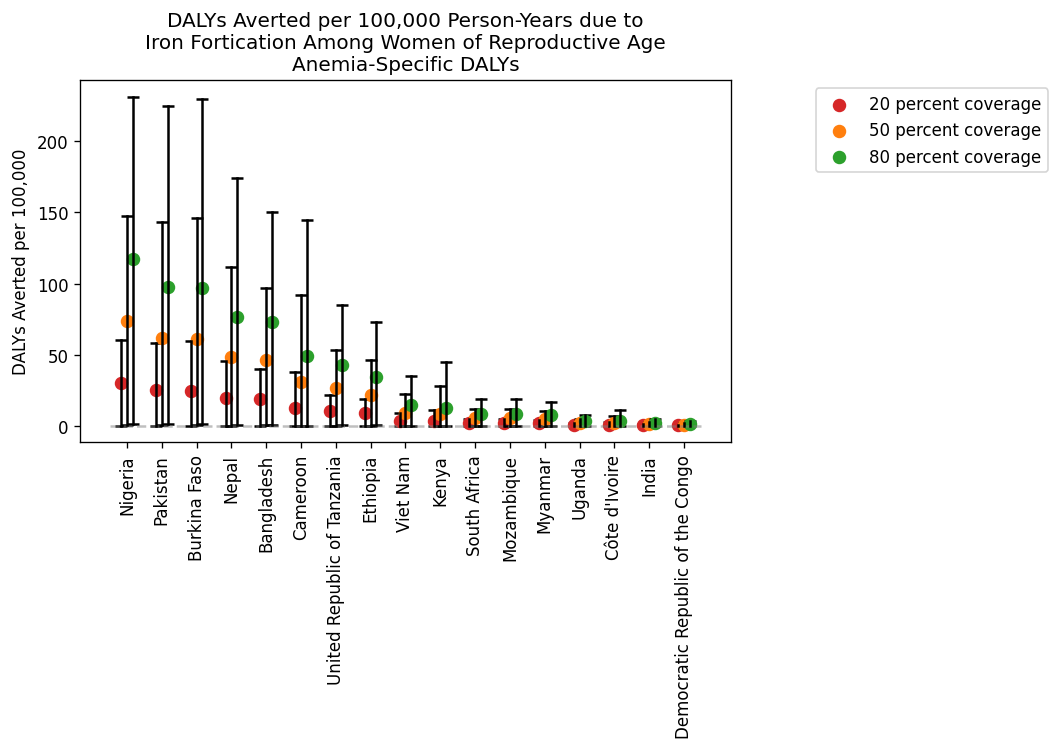

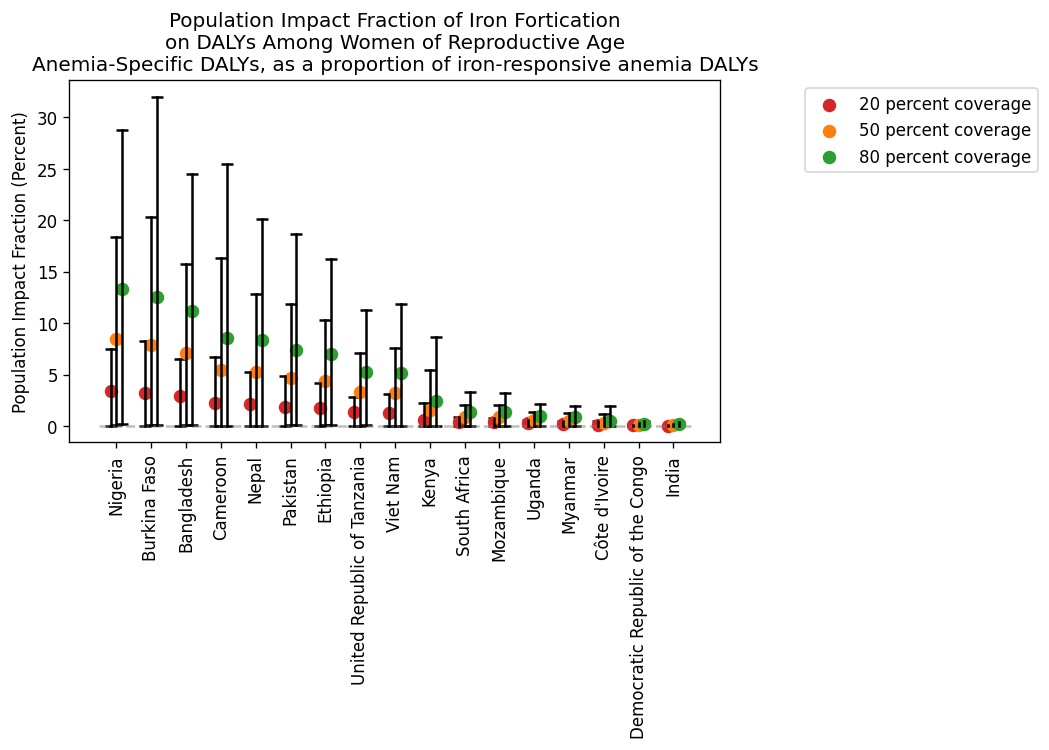

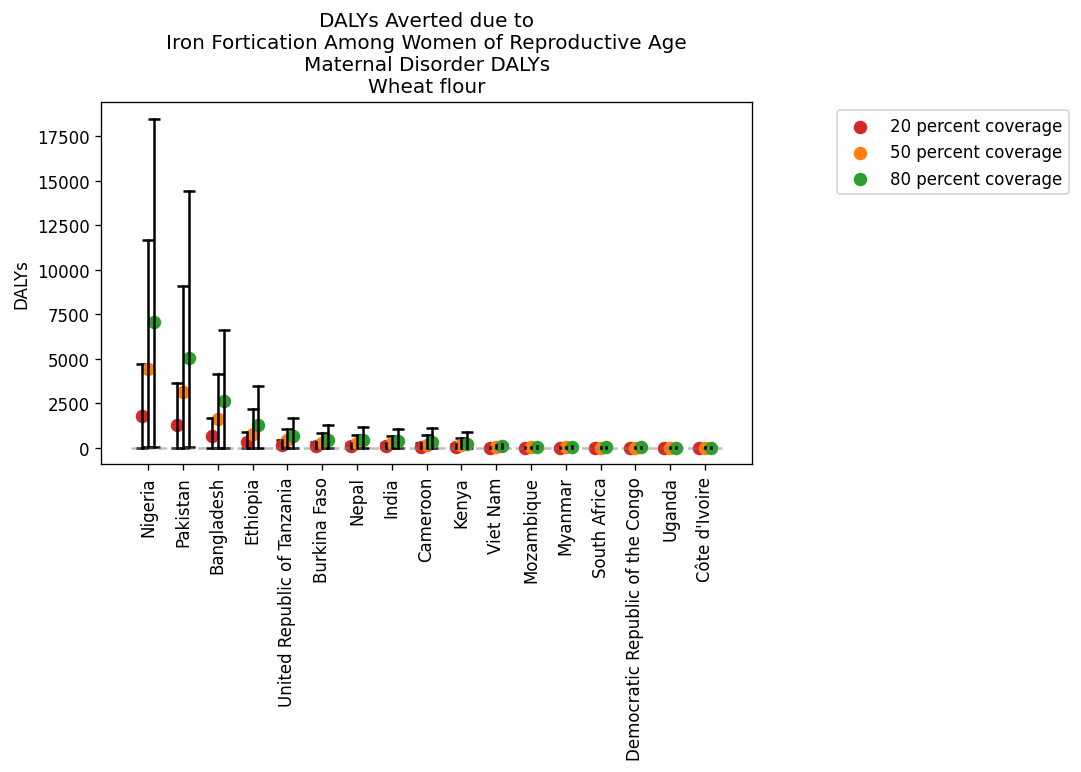

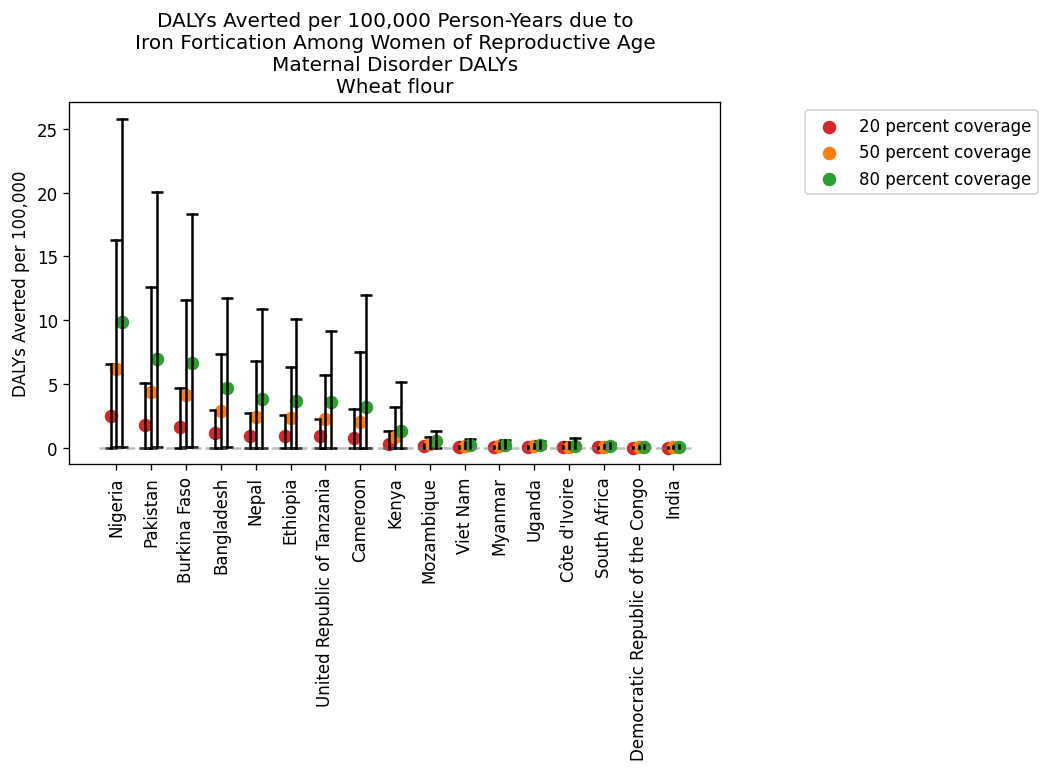

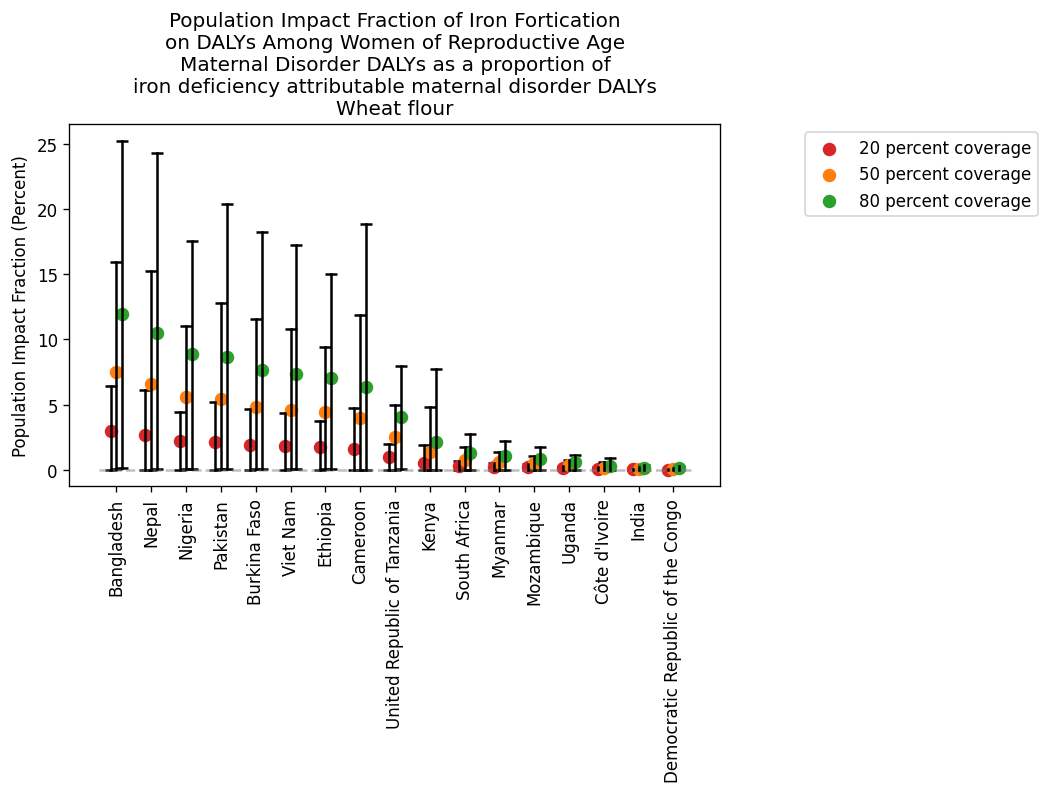

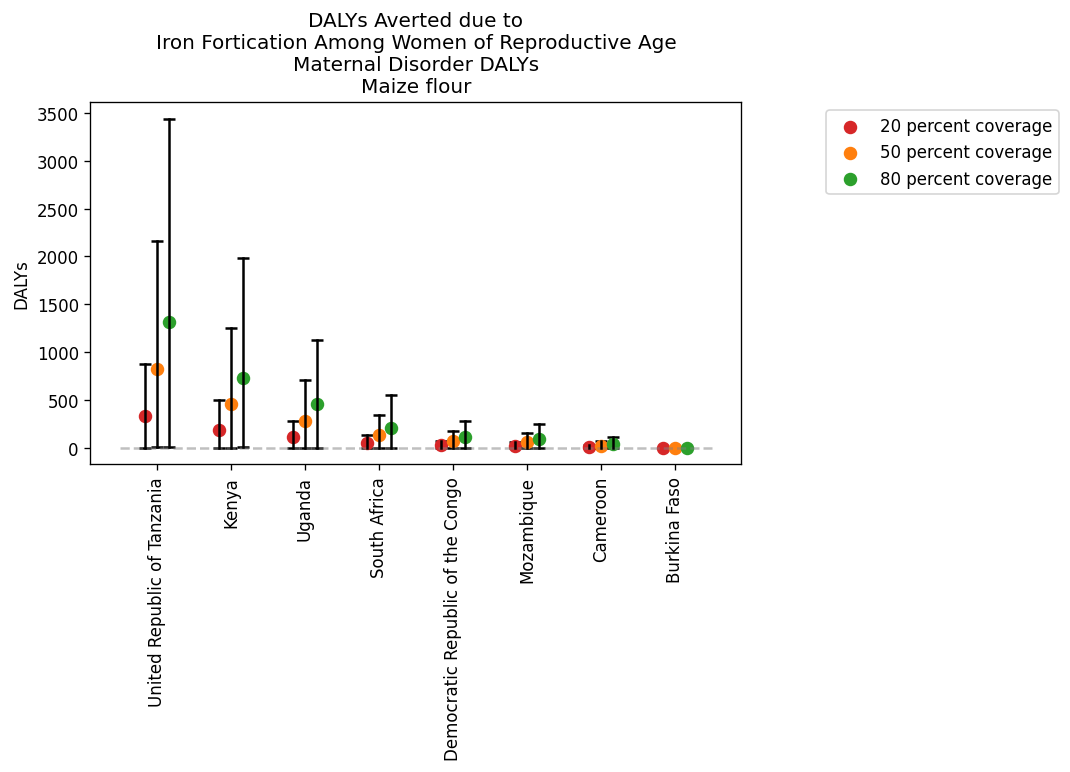

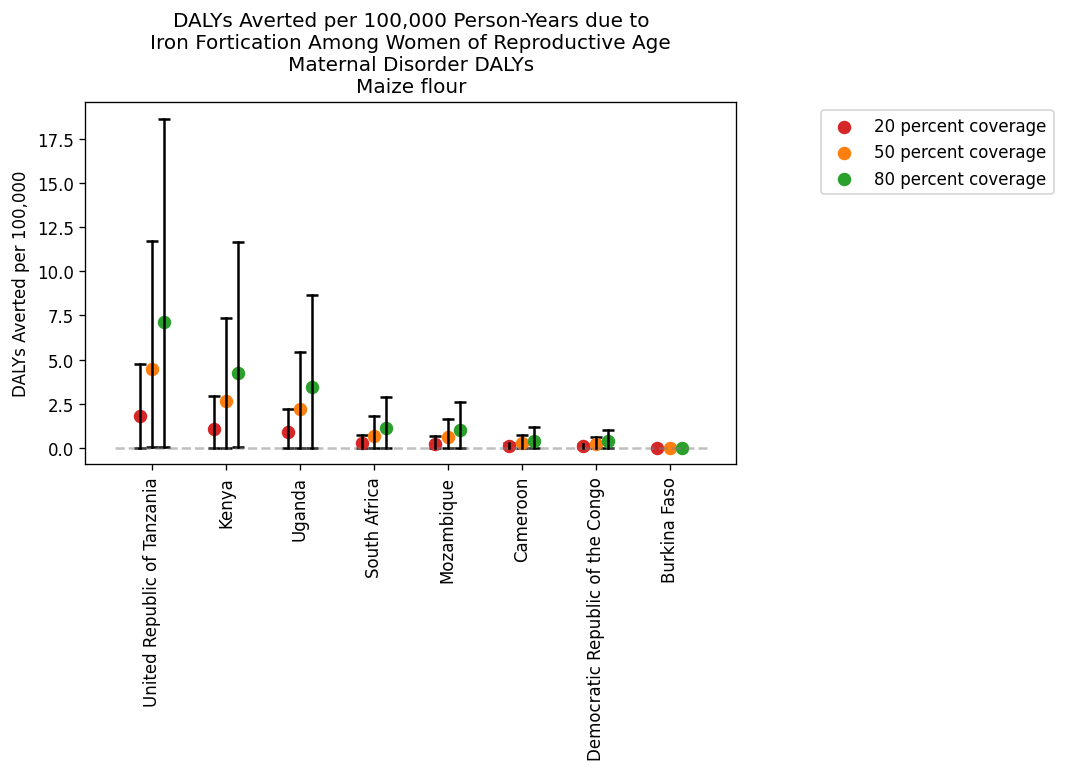

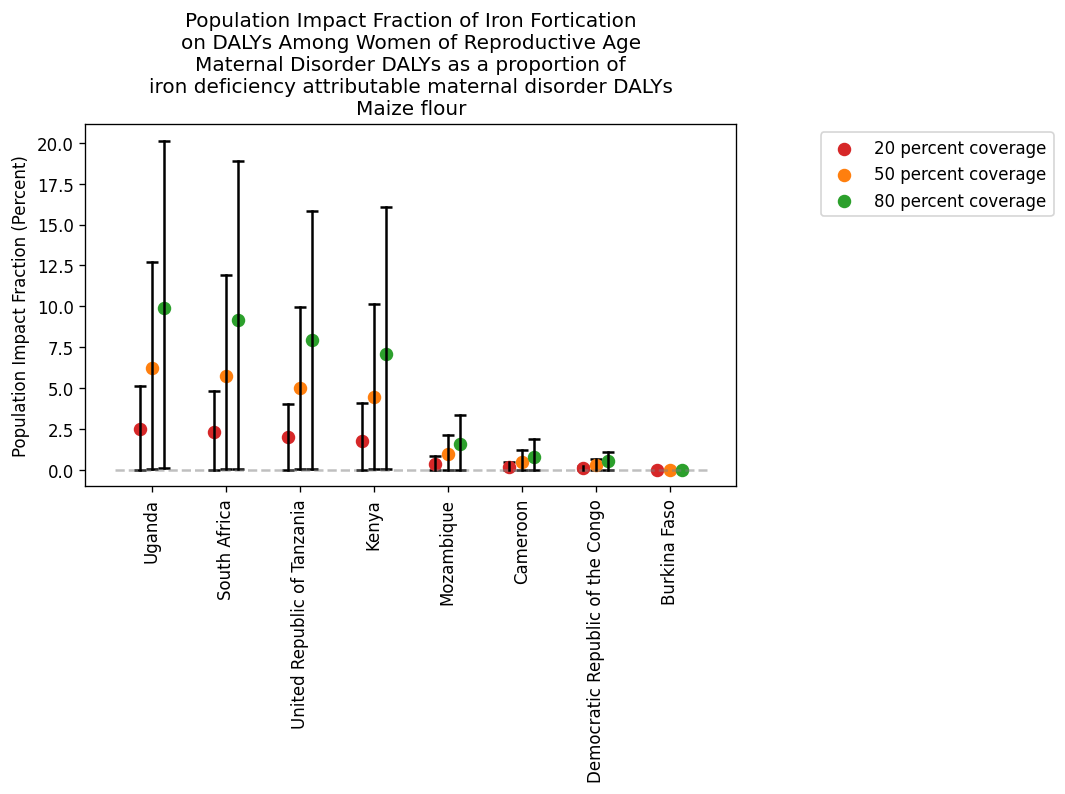

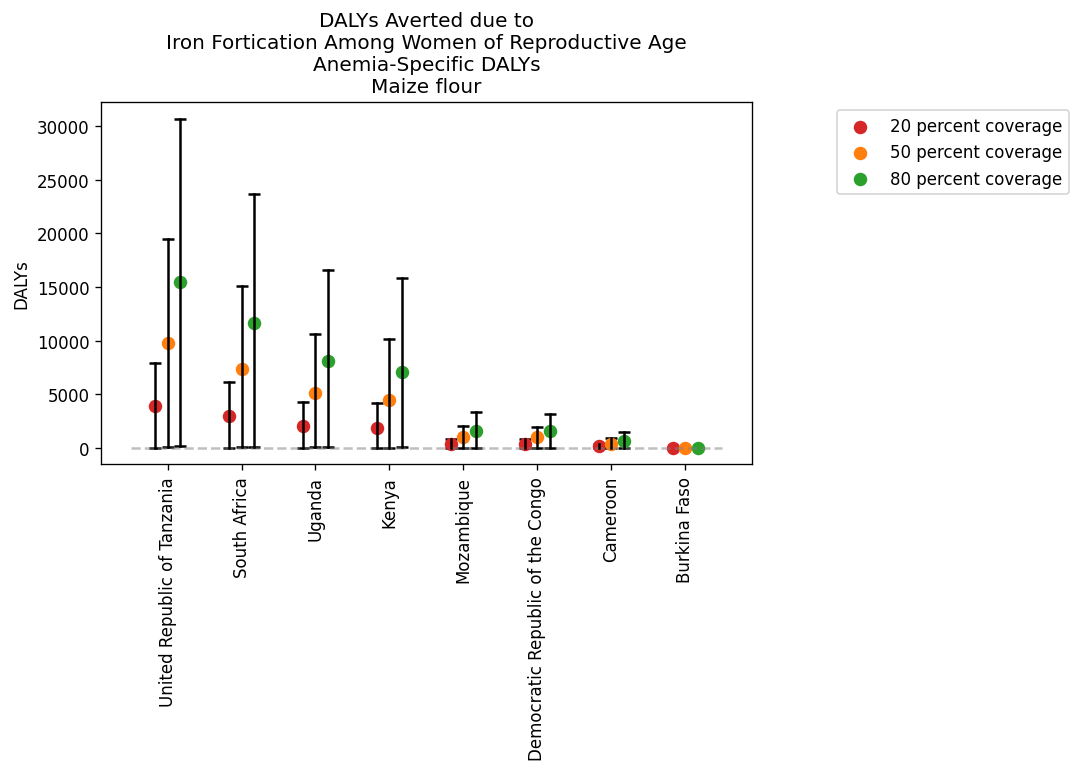

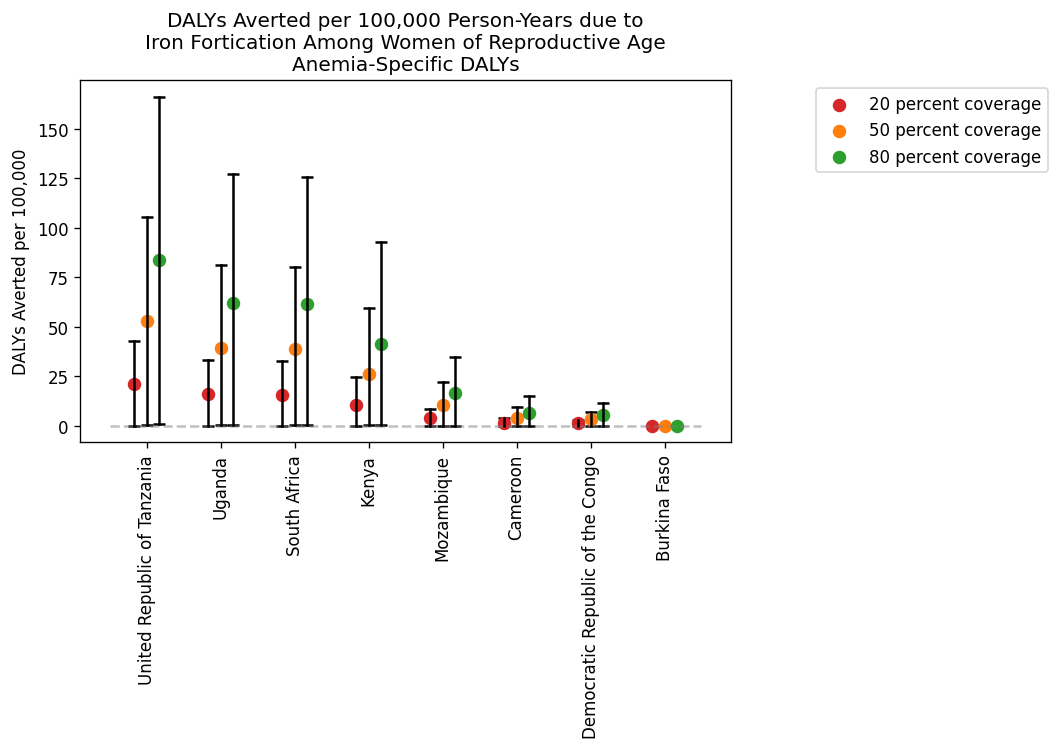

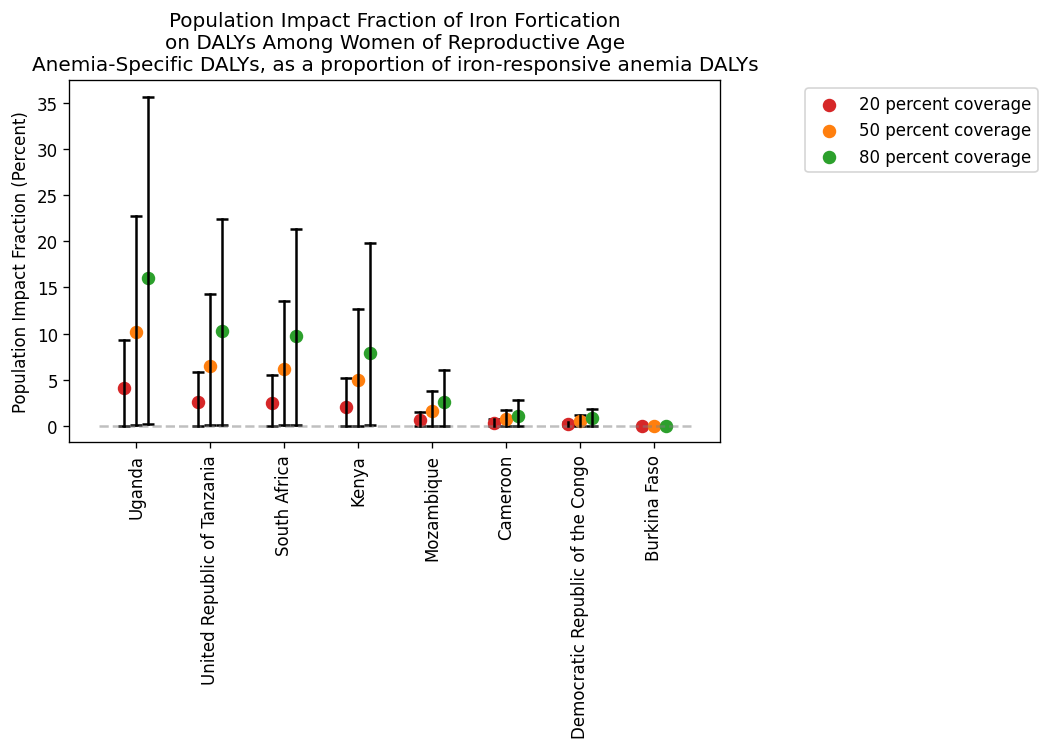

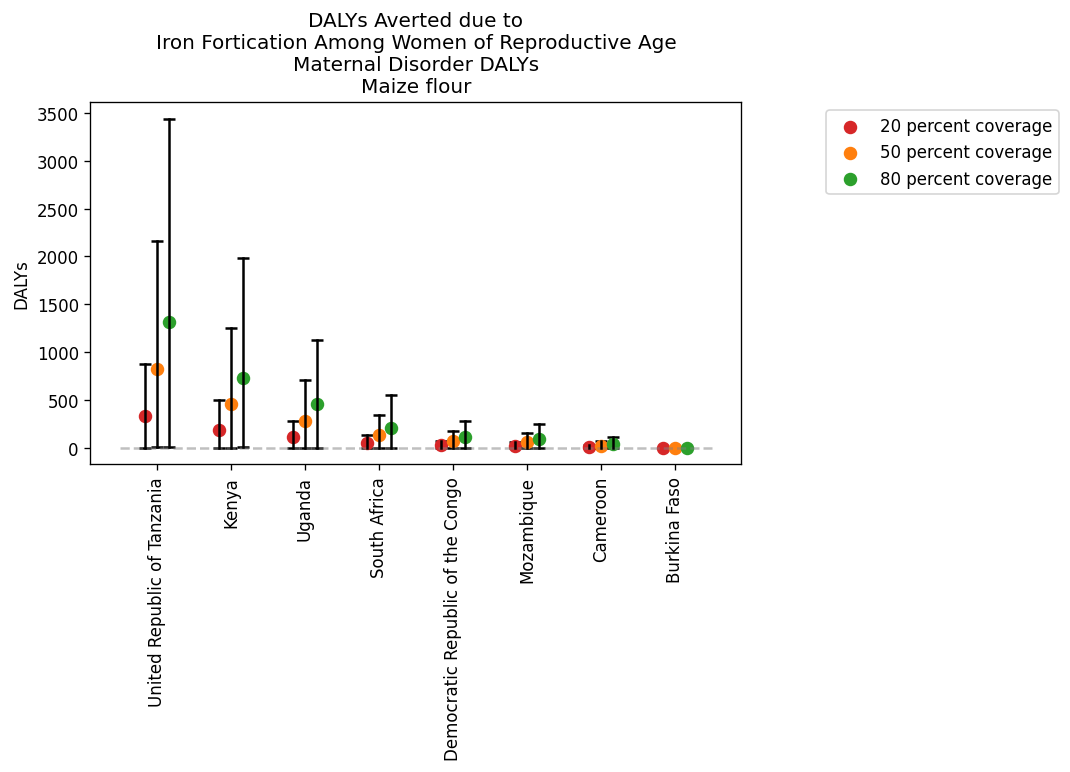

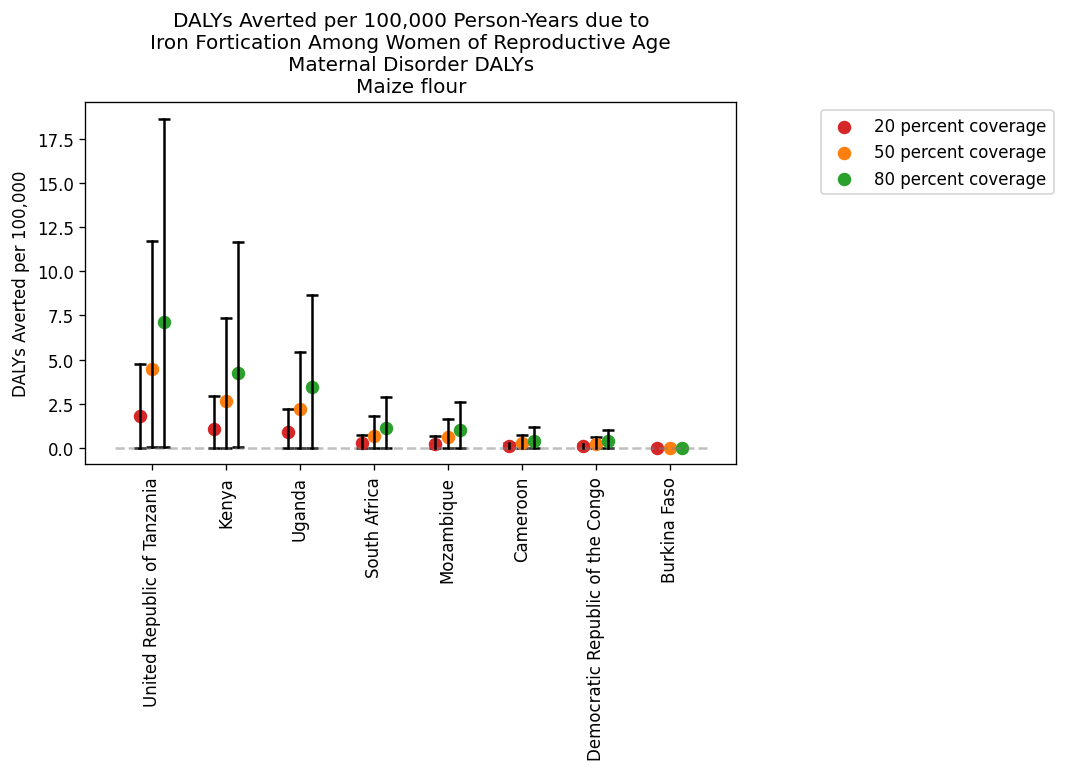

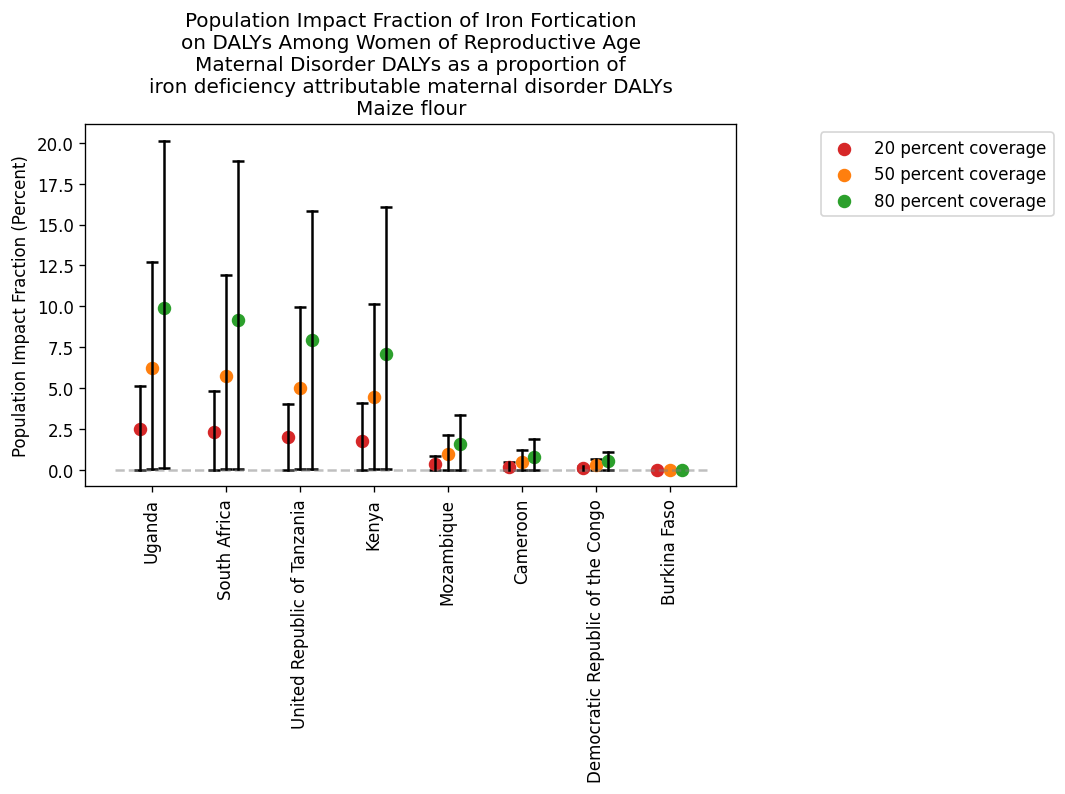

In [169]:
with PdfPages('results_plots/iron_wra.pdf') as pdf:
    for vehicle in vehicles:
        make_dot_plots((maternal_counts_averted.reset_index()
         .loc[maternal_counts_averted.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns='vehicle')), 
        'Iron', 
        'counts', 
        coverage_levels, f'Maternal Disorder DALYs\n{vehicle.capitalize()}', 
        f'iron_wra_maternal_disorder_counts_averted_{vehicle}', True)
        pdf.savefig(bbox_inches='tight')
        make_dot_plots(
        (maternal_rates_averted.reset_index()
         .loc[maternal_rates_averted.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns='vehicle')), 
        'Iron', 
        'rates', 
        coverage_levels, f'Maternal Disorder DALYs\n{vehicle.capitalize()}', 
        f'iron_wra_maternal_disorder_rates_averted_{vehicle}', True)
        pdf.savefig(bbox_inches='tight')
        make_dot_plots(
        (maternal_disorders_pif.reset_index()
         .loc[maternal_disorders_pif.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns='vehicle')), 
        'Iron', 
        'pifs', 
        coverage_levels, f'Maternal Disorder DALYs as a proportion of\niron deficiency attributable maternal disorder DALYs\n{vehicle.capitalize()}', 
        f'iron_wra_maternal_disorder_pif_{vehicle}', True)
        pdf.savefig(bbox_inches='tight')
        make_dot_plots(
        (anemia_counts_averted.reset_index()
         .loc[anemia_counts_averted.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns='vehicle')), 
        'Iron', 
        'counts', 
        coverage_levels, f'Anemia-Specific DALYs\n{vehicle.capitalize()}', 
        f'iron_wra_anemia_counts_averted_{vehicle}', True)
        pdf.savefig(bbox_inches='tight')
        make_dot_plots(
        (anemia_rates_averted.reset_index()
         .loc[anemia_rates_averted.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns='vehicle')), 
        'Iron', 
        'rates', 
        coverage_levels, 'Anemia-Specific DALYs', 
        f'iron_wra_anemia_rates_averted_{vehicle}', True)
        pdf.savefig(bbox_inches='tight')
        make_dot_plots(
        (anemia_pifs.reset_index()
         .loc[anemia_pifs.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns='vehicle')), 
        'Iron', 
        'pifs', 
        coverage_levels, 'Anemia-Specific DALYs, as a proportion of iron-responsive anemia DALYs', 
        f'iron_wra_anemia_pif_{vehicle}', True)
        pdf.savefig(bbox_inches='tight')
        make_dot_plots(
        (maternal_counts_averted.reset_index()
         .loc[maternal_counts_averted.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns='vehicle')), 
        'Iron', 
        'counts', 
        coverage_levels, f'Maternal Disorder DALYs\n{vehicle.capitalize()}', 
        f'iron_wra_maternal_disorder_counts_averted_{vehicle}', True)
        pdf.savefig(bbox_inches='tight')
        make_dot_plots(
        (maternal_rates_averted.reset_index()
         .loc[maternal_rates_averted.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns='vehicle')), 
        'Iron', 
        'rates', 
        coverage_levels, f'Maternal Disorder DALYs\n{vehicle.capitalize()}', 
        f'iron_wra_maternal_disorder_rates_averted_{vehicle}', True)
        pdf.savefig(bbox_inches='tight')
        make_dot_plots(
        (maternal_disorders_pif.reset_index()
         .loc[maternal_disorders_pif.reset_index().vehicle==vehicle]
         .set_index(['location_id','coverage_level','year'])
         .drop(columns='vehicle')), 
        'Iron', 
        'pifs', 
        coverage_levels, f'Maternal Disorder DALYs as a proportion of\niron deficiency attributable maternal disorder DALYs\n{vehicle.capitalize()}', 
        f'iron_wra_maternal_disorder_pif_{vehicle}', True)
        pdf.savefig(bbox_inches='tight')